# Projet 3: Idée d'applicaton
    1 - Notebook pour le nettoyage 
    1 - Notebooke pour l'analyse exploratoire (Notebook actuel)
    1 - PPT pour la présentation de de l'idée

### Notes de cadrage:
 - Après lecture des variables, l'idée qui m'est venue est de proposer une application qui indique si oui ou non un produit sacnnée est compatible avec un régime alimentaire choisi. Pour l'exemple nous choisirons le régime cétogène
 - Caratéristique du régime cétogène : lipide[70-80], protéine [20-25], glucide [5-10]
 - L'application propesera des notes d'infos sur les produits de ce régimes. Ces notes proviendront de l'analyse exploratoire que nous mèneront
 - Une fois la fonction de filtre écrite, il faudra automatiser les étapes de formatage de la data pour que mon application puisse marcher.
 
#Nettoyage : type de données ok ou non? 
#Verifier les données si doublon ou non
#Verifier si j'ai des produits erronnés ou pas
#Vérifier la faisabilité de mon application
#Regarder la correlation entre les produits et le nutriscore (proposer une partie revues, articles)
plotly --- pour la visualisation à explorer 

objetcif de la prochaine séance : nettoyage, univarié et commencer le bivarié
duplicat ou pas? analyse de valeurs manquantes?


### Notes méthodolgie de nettoyage
    1) Ecrire une fonction de suppression de produits dont l'url pointe sur une page d'erreur
    2)Supprimer les doublons
    3)Mettre les valeurs aberrantes en nan
    4)Imputer les nan avec une acp ou les kmeans
    5) Ecrire une fonction de formattag des données pour la l'application

### Librairies

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import csv
import dask.dataframe as dd
import dask

In [2]:
# Affichage
pd.options.display.max_rows = 200
pd.options.display.max_columns = 200

### Importation du jeu du données

In [4]:
data = pd.read_csv("D:\Openclassrooms\Projets\P3_KOKORA_AMON\data_saved.csv")

In [5]:
### Fonction prototype idée d'application
#Function indicatrice si produit keto compatible ou non
def keto_friendly(row):
    '''
    Cette fonction indique si un produit est compatible avec le régime Keto ou non
    
    '''
    total = np.nansum(row[['fat_100g','proteins_100g','sugars_100g']])
    if total == 0:
        total = 1
    cond_1=row['fat_100g']*100/total in pd.Interval(70,80)
    cond_2=row['proteins_100g']*100/total in pd.Interval(20,25)
    cond_3=row['sugars_100g']*100/total in pd.Interval(5,10)
    if (cond_1 & cond_2 & cond_3):
        return 1
    else:
        return 0

In [6]:
data.head(100)

Unnamed: 0                code  \
0            0       0000000000017   
1            3  000000000004622327   
2            4       0000000000100   
3            6       0000000000123   
4            7       0000000000178   
5           13        000000000080   
6           15       0000000000949   
7           16       0000000000970   
8           19        000000000112   
9           20       0000000001137   
10          21        000000000114   
11          22       0000000001151   
12          23       0000000001199   
13          24       0000000001281   
14          25        000000000129   
15          26       0000000001311   
16          27       0000000001328   
17          30       0000000001564   
18          33        000000000186   
19          34       0000000001885   
20          35       0000000002042   
21          37       0000000002219   
22          38       0000000002257   
23          39       0000000002264   
24          40       0000000002363   
25          41       0000000002400   
26          42       0000000002417   
27          43       0000000003018   
28          45       0000000003384   
29          47       0000000003780   
30          48       0000000003803   
31          49       0000000003827   
32          50       0000000004206   
33          51        000000000429   
34          52       0000000004299   
35          55       0000000004510   
36          56       0000000004530   
37          57       0000000004559   
38          59       0000000004572   
39          61       0000000004794   
40          63       0000000005005   
41          64       0000000005081   
42          65       0000000005166   
43          66       0000000005241   
44          67       0000000005272   
45          68       0000000005388   
46          69       0000000005470   
47          70       0000000005500   
48          71       0000000005661   
49          72       0000000007009   
50          73       0000000007160   
51          78        000000000936   
52          82       0000000010115   
53          84       0000000010900   
54          85       0000000011150   
55          92       0000000012249   
56          93       0000000012256   
57          94       0000000012263   
58          95        000000001231   
59          96       0000000012775   
60          99       0000000013406   
61         100       0000000013819   
62         105       0000000014595   
63         107       0000000015172   
64         108        000000001518   
65         109       0000000015509   
66         111       0000000015721   
67         112        000000001576   
68         113       0000000015769   
69         114       0000000016087   
70         115       0000000016094   
71         116       0000000016100   
72         117       0000000016117   
73         118       0000000016124   
74         119       0000000016193   
75         121       0000000016612   
76         122       0000000016650   
77         124       0000000016872   
78         125       0000000016933   
79         126       0000000017497   
80         127        000000001756   
81         128        000000001757   
82         130       0000000018012   
83         131       0000000018050   
84         132       0000000018173   
85         133       0000000018197   
86         134       0000000018227   
87         135       0000000018265   
88         136       0000000018289   
89         137       0000000018319   
90         138       0000000018340   
91         139       0000000018357   
92         141       0000000018388   
93         142       0000000018395   
94         143       0000000018401   
95         144       0000000018418   
96         145       0000000018449   
97         146       0000000018456   
98         147       0000000018500   
99         148       0000000018517   

                                                  url  \
0   http://world-en.openfoodfacts.org/product/0000...   
1   http://world-en.openfoodfacts.org/product/0000.

In [7]:
data.info()
# on a 1372976 ligne pour 27 colonnes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372976 entries, 0 to 1372975
Data columns (total 28 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   Unnamed: 0                   1372976 non-null  int64  
 1   code                         1372976 non-null  object 
 2   url                          1372976 non-null  object 
 3   product_name                 1372976 non-null  object 
 4   brands_tags                  755067 non-null   object 
 5   countries                    1370861 non-null  object 
 6   ingredients_text             603533 non-null   object 
 7   nutriscore_grade             652252 non-null   object 
 8   pnns_groups_1                1370725 non-null  object 
 9   pnns_groups_2                1372976 non-null  object 
 10  brand_owner                  267463 non-null   object 
 11  ecoscore_grade_fr            360261 non-null   object 
 12  main_category                725401 non-nu

In [8]:
del data['Unnamed: 0']
# mettre à l'étape nettoyage
data['nova_group'] = data['nova_group'].astype('object')

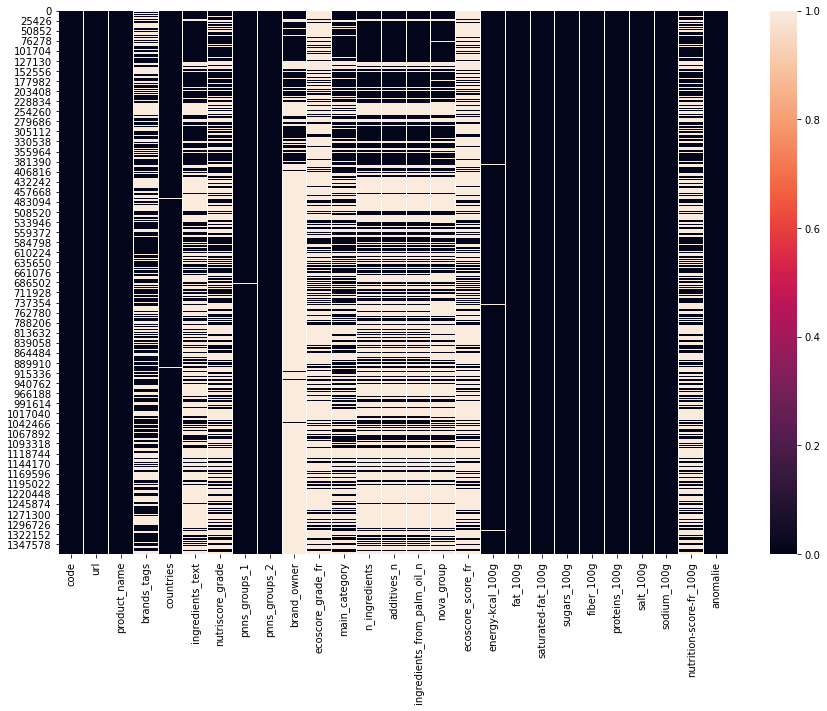

In [9]:
#visulisation des valeurs manquantes
plt.figure(figsize=(15,10))
sns.heatmap(data.isna())
plt.show()

In [10]:
# Application de la fonction de classification keto_friendly or not
data['keto_friendly'] = data.apply(keto_friendly, axis=1)

In [11]:
data.head()

code                                                url  \
0       0000000000017  http://world-en.openfoodfacts.org/product/0000...   
1  000000000004622327  http://world-en.openfoodfacts.org/product/0000...   
2       0000000000100  http://world-en.openfoodfacts.org/product/0000...   
3       0000000000123  http://world-en.openfoodfacts.org/product/0000...   
4       0000000000178  http://world-en.openfoodfacts.org/product/0000...   

                   product_name    brands_tags countries  \
0              Vitória crackers            NaN    FRANCE   
1  Hamburguesas de ternera 100%            NaN        ES   
2   moutarde au moût de raisin   courte-paille    FRANCE   
3         Sauce Sweety chili 0%            NaN    FRANCE   
4                     Mini coco            NaN    FRANCE   

                                    ingredients_text nutriscore_grade  \
0                                                NaN              NaN   
1                                                NaN              NaN   
2  eau graines de téguments de moutarde vinaigre ...                d   
3                                                NaN              NaN   
4                                                NaN              NaN   

    pnns_groups_1         pnns_groups_2 brand_owner ecoscore_grade_fr  \
0         unknown               unknown         NaN               NaN   
1         unknown               unknown         NaN               NaN   
2  Fat and sauces  Dressings and sauces         NaN                 b   
3         unknown               unknown         NaN               NaN   
4         unknown               unknown         NaN               NaN   

  main_category  n_ingredients  additives_n  ingredients_from_palm_oil_n  \
0           NaN            NaN          NaN                          NaN   
1           NaN            NaN          NaN                          NaN   
2   en:mustards            1.0          0.0                          0.0   
3           NaN            NaN          NaN                          NaN   
4           NaN            NaN          NaN                          NaN   

  nova_group  ecoscore_score_fr  energy-kcal_100g  fat_100g  \
0        NaN                NaN        375.000000       7.0   
1        NaN                NaN        874.900000      15.1   
2        NaN               60.0        223.559759       8.2   
3        NaN                NaN         21.000000       0.0   
4        NaN                NaN         60.000000       3.0   

   saturated-fat_100g  sugars_100g  fiber_100g  proteins_100g  salt_100g  \
0                3.08         15.0         0.0            7.8       1.40   
1                6.10          1.0         0.0           15.7       2.10   
2                2.20         22.0         0.0            5.1       4.60   
3                0.00          0.4         0.0            0.2       2.04   
4                1.00          3.0         0.0            2.0       1.15   

   sodium_100g  nutrition-score-fr_100g  anomalie  keto_friendly  
0        0.560                      NaN         0              0  
1        0.840                      NaN         0              0  
2        1.840                     18.0         0              0  
3        0.816                      NaN         0              0  
4        0.460                      NaN         0              0

In [12]:
data['keto_friendly'].value_counts()

0    1370077
1       2899
Name: keto_friendly, dtype: int64

In [13]:
data.anomalie.value_counts()

0    1163212
1     209764
Name: anomalie, dtype: int64

#### les anomalies sont les produits pour lesquels il y au moins une valeurs nutritives aberrantes non (0<x<100)

In [14]:
# suppression des lignes avec anomalie

In [15]:
data_0 = data[data['anomalie']==0]

In [16]:
data_0['keto_friendly'].value_counts()

0    1160950
1       2262
Name: keto_friendly, dtype: int64

In [17]:
#visulaiation des valeurs manquantes
sns.set_style('darkgrid')
sns.set(rc={"figure.figsize":(15, 12)})

<AxesSubplot:>

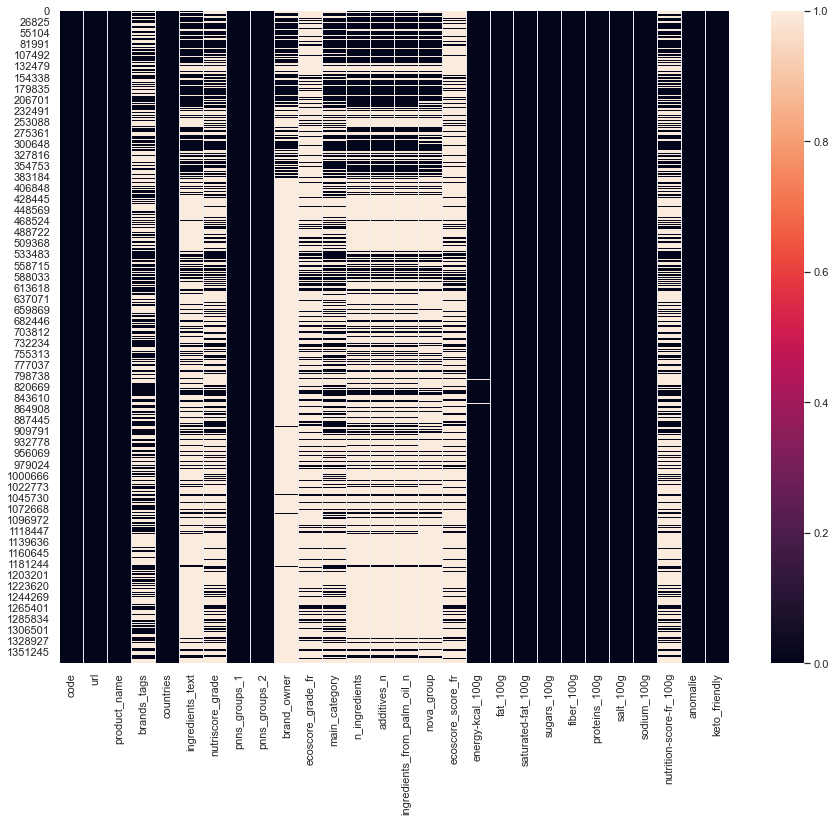

In [18]:
sns.heatmap(data_0.isna())

### Notes : 
    - Les données avec des anomalies ont été écartées en attendant d'avoir des impuations plus adaptées
    - Le jeux de données plutôt assez bien remplis, 

In [19]:
data_0.shape

(1163212, 28)

### Groupes de variables

In [20]:
#variable cible
target = 'keto_friendly'

#variables quanti
var_quant = data_0.select_dtypes('float').columns

# var catégorielle
var_cat = ['nutriscore_grade','pnns_groups_1','pnns_groups_2','nova_group','ecoscore_grade_fr']

### Exploration variable target

In [21]:
print(data_0[target].value_counts())
print(data_0[target].value_counts(normalize=True)*100)

0    1160950
1       2262
Name: keto_friendly, dtype: int64
0    99.805538
1     0.194462
Name: keto_friendly, dtype: float64


#### Notes : < 1% des produits sont compatibles avec le régime cétogènes selon les standards

### Exploration variables qauntitatives

### Analyse univariée

In [22]:
data_0[var_quant].describe()

n_ingredients    additives_n  ingredients_from_palm_oil_n  \
count  413192.000000  413192.000000                413192.000000   
mean       10.138352       1.910468                     0.016794   
std         9.623021       2.699705                     0.129716   
min         1.000000       0.000000                     0.000000   
25%         4.000000       0.000000                     0.000000   
50%         8.000000       1.000000                     0.000000   
75%        14.000000       3.000000                     0.000000   
max       235.000000      37.000000                     2.000000   

       ecoscore_score_fr  energy-kcal_100g      fat_100g  saturated-fat_100g  \
count      285731.000000      1.155439e+06  1.163212e+06        1.163212e+06   
mean           45.587353      2.686418e+02  1.335506e+01        4.995120e+00   
std            24.801484      1.860860e+02  1.703007e+01        7.753307e+00   
min           -23.000000      0.000000e+00  0.000000e+00        0.000000e+00   
25%            29.000000      1.030000e+02  6.000000e-01        1.000000e-02   
50%            39.000000      2.560000e+02  6.600000e+00        1.600000e+00   
75%            65.000000      3.930000e+02  2.143000e+01        7.000000e+00   
max           125.000000      1.000000e+03  1.000000e+02        9.990000e+01   

        sugars_100g    fiber_100g  proteins_100g     salt_100g   sodium_100g  \
count  1.163212e+06  1.163212e+06   1.163212e+06  1.163212e+06  1.163212e+06   
mean   1.308446e+01  4.793701e-01   8.980013e+00  1.157467e+00  4.773294e-01   
std    1.967014e+01  2.428680e+00   1.014511e+01  3.151889e+00  1.562104e+00   
min    0.000000e+00  0.000000e+00   0.000000e+00  0.000000e+00  0.000000e+00   
25%    5.000000e-01  0.000000e+00   1.300000e+00  2.750000e-02  1.120000e-02   
50%    3.530000e+00  0.000000e+00   6.000000e+00  4.600000e-01  1.841053e-01   
75%    1.666752e+01  0.000000e+00   1.300000e+01  1.400000e+00  5.600000e-01   
max    9.999000e+01  9.900000e+01   9.990000e+01  9.990000e+01  9.880000e+01   

       nutrition-score-fr_100g  
count            480666.000000  
mean                  9.331030  
std                   8.898292  
min                 -15.000000  
25%                   2.000000  
50%                  11.000000  
75%                  16.000000  
max                  40.000000

In [23]:
data_0[data_0.n_ingredients==235]['url'].values
# Ce produit exite, le nombre d'ingédient n'est pas abberant

array(['http://world-en.openfoodfacts.org/product/06481016/kellogg-s-nutri-grain-kellogs'],
      dtype=object)

graphique variable actuel :n_ingredients


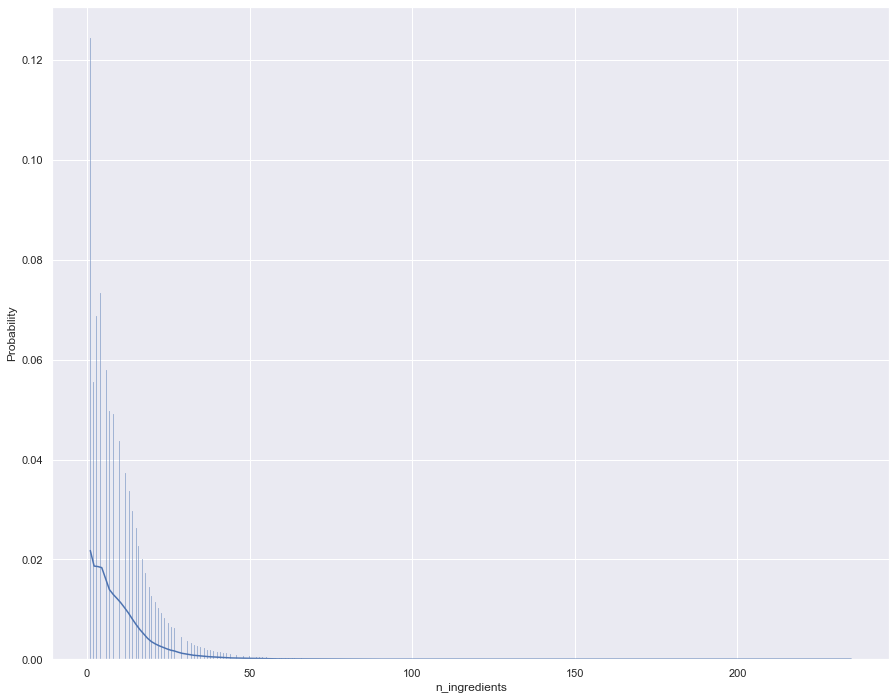

graphique variable actuel :additives_n


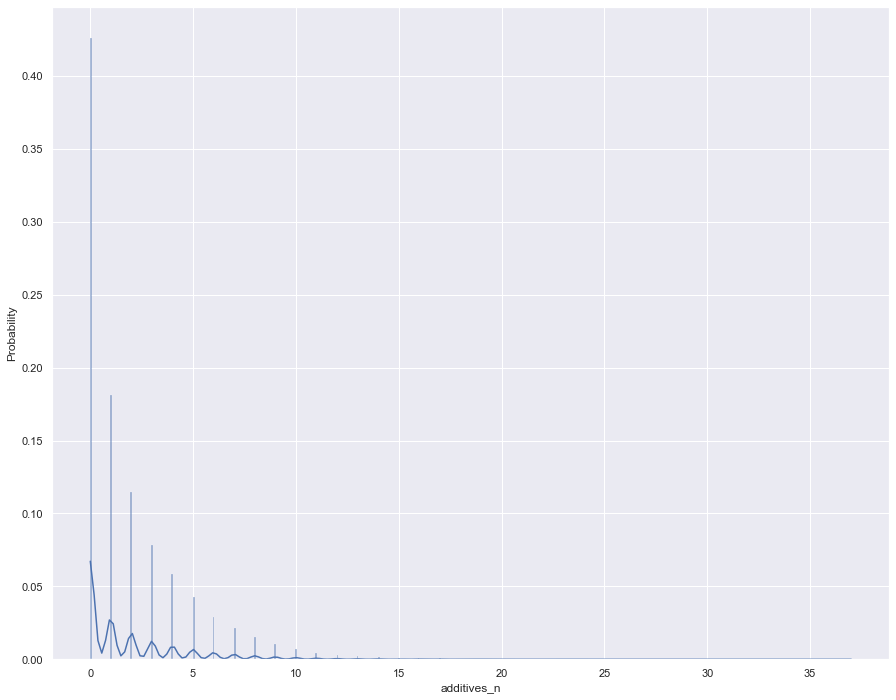

graphique variable actuel :ingredients_from_palm_oil_n


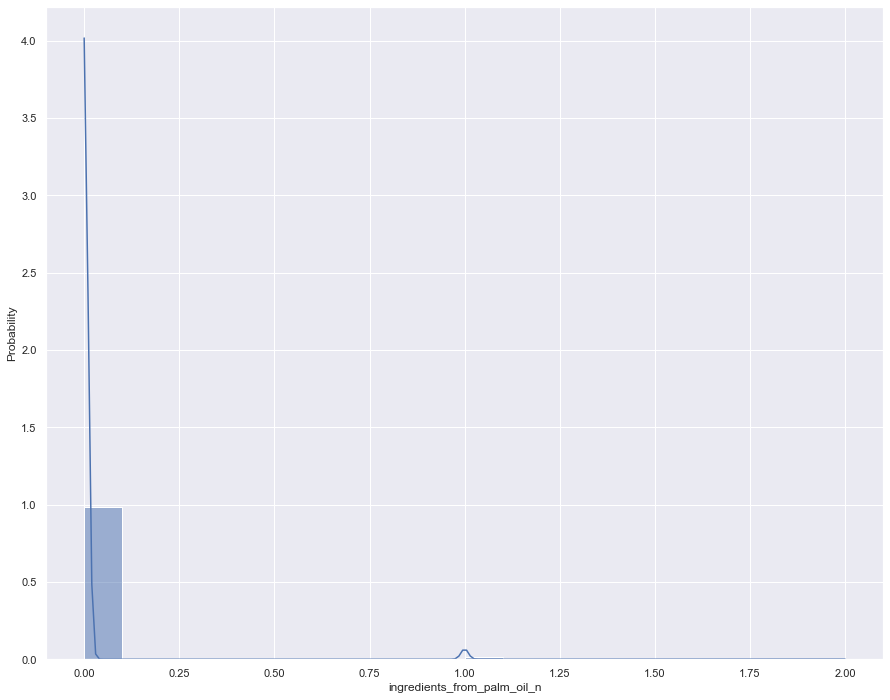

graphique variable actuel :ecoscore_score_fr


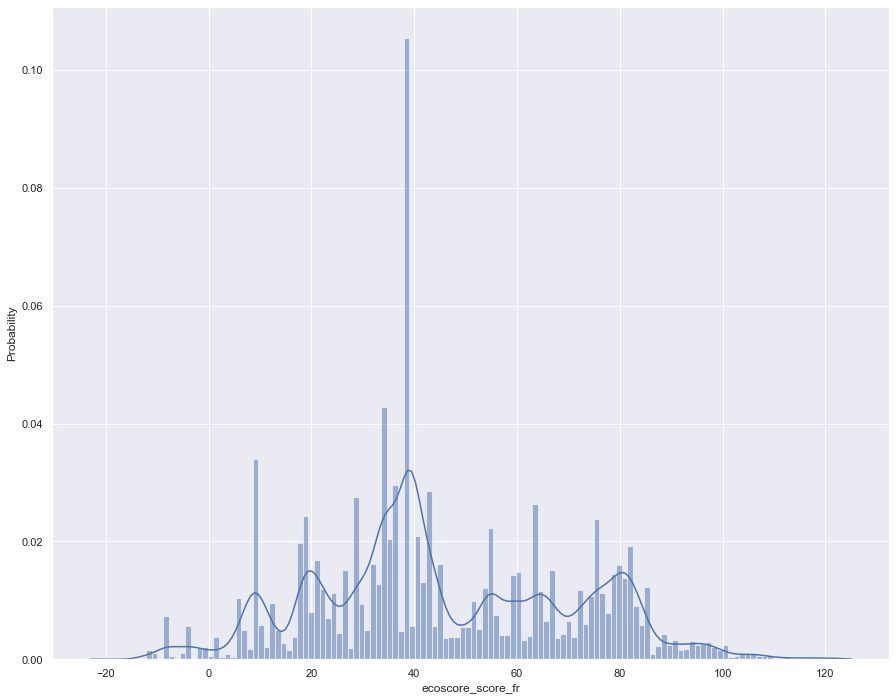

graphique variable actuel :energy-kcal_100g


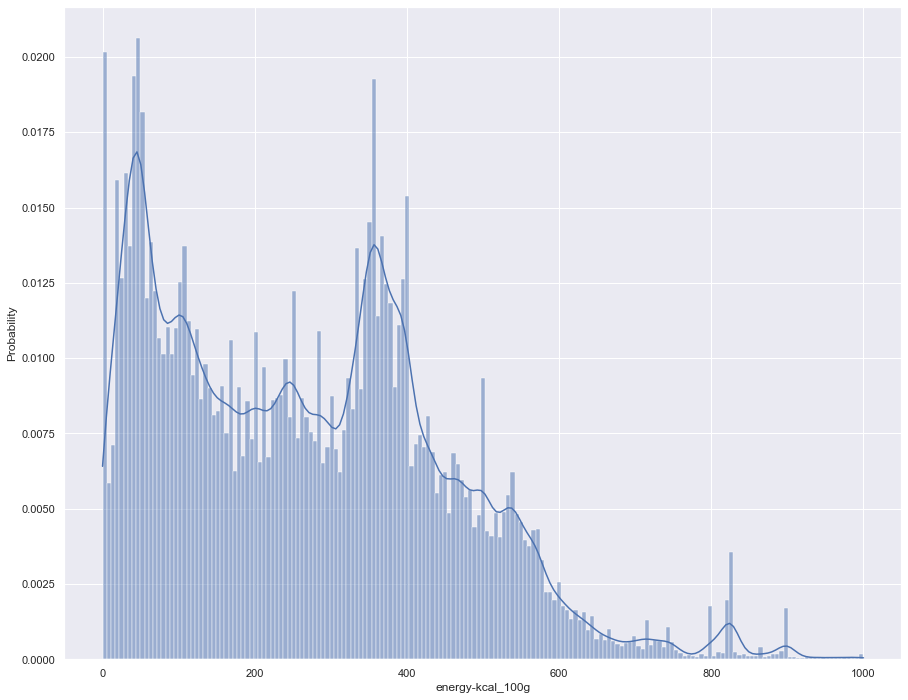

graphique variable actuel :fat_100g


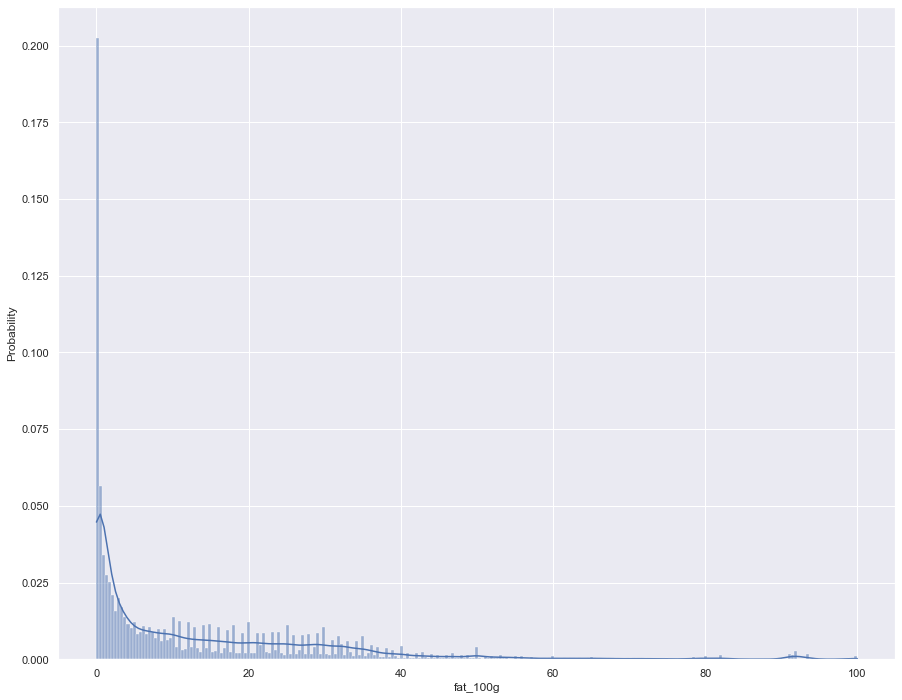

graphique variable actuel :saturated-fat_100g


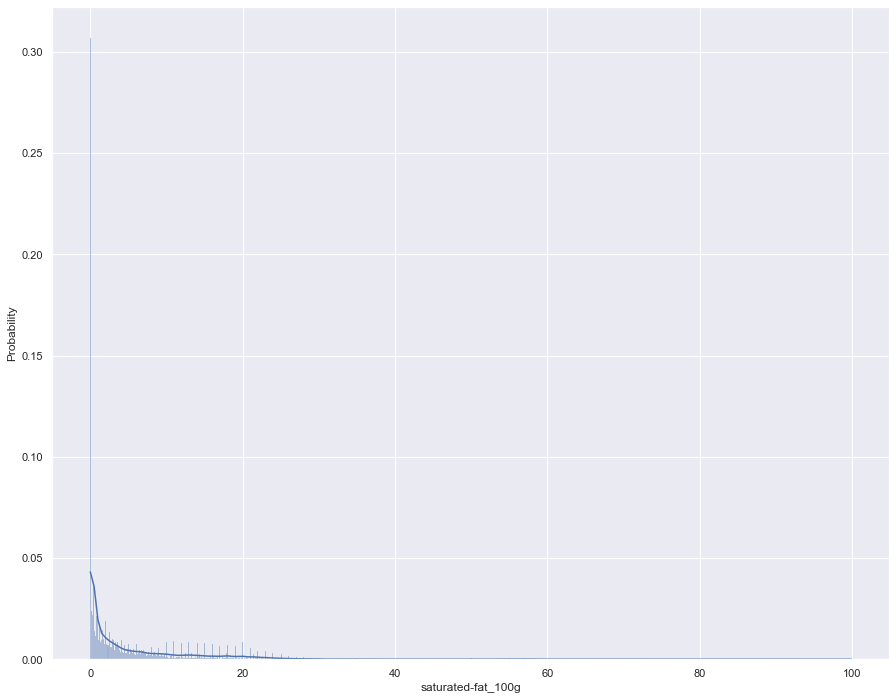

graphique variable actuel :sugars_100g


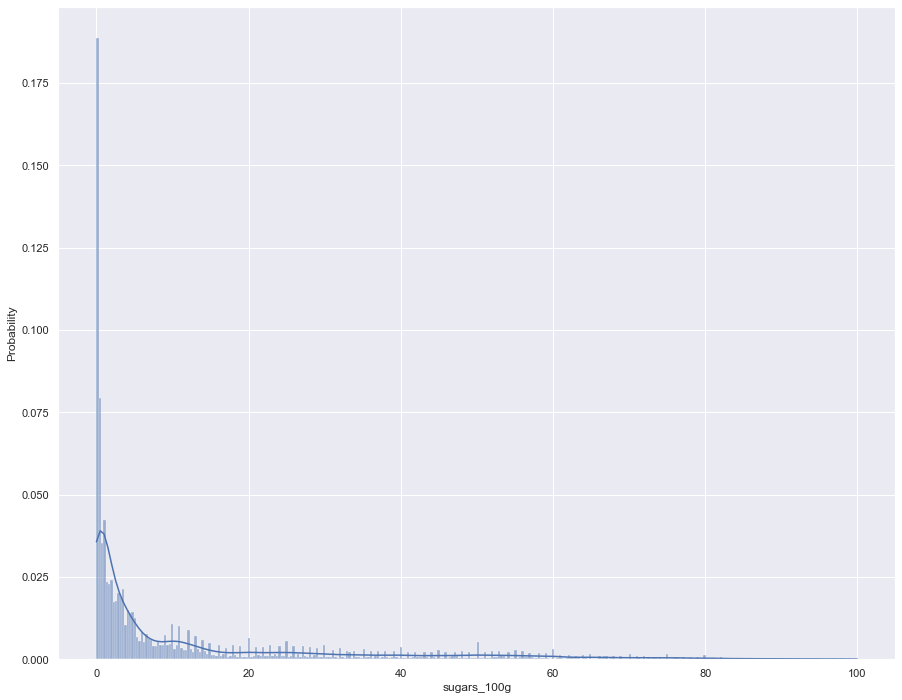

graphique variable actuel :fiber_100g


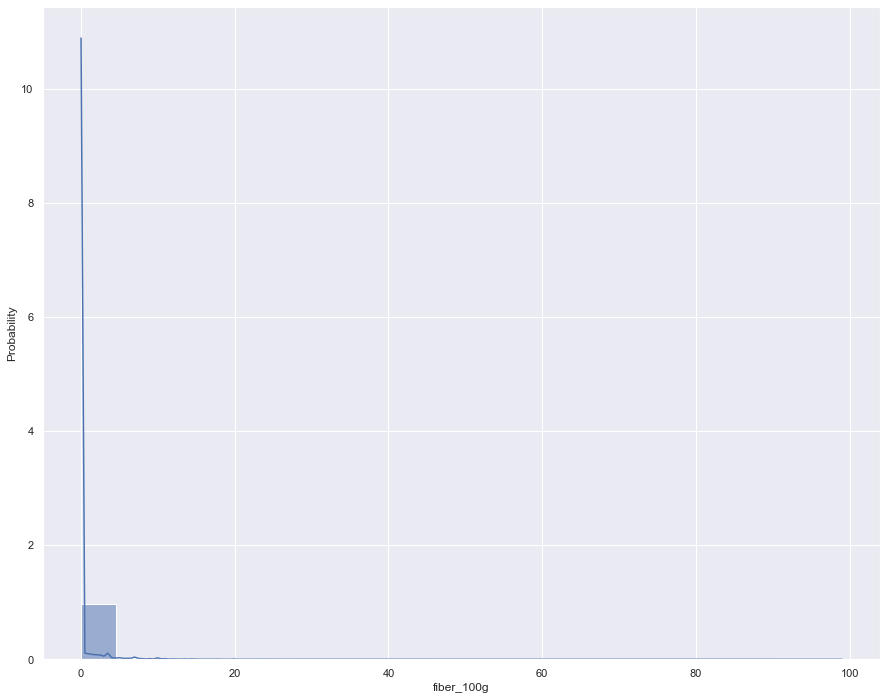

graphique variable actuel :proteins_100g


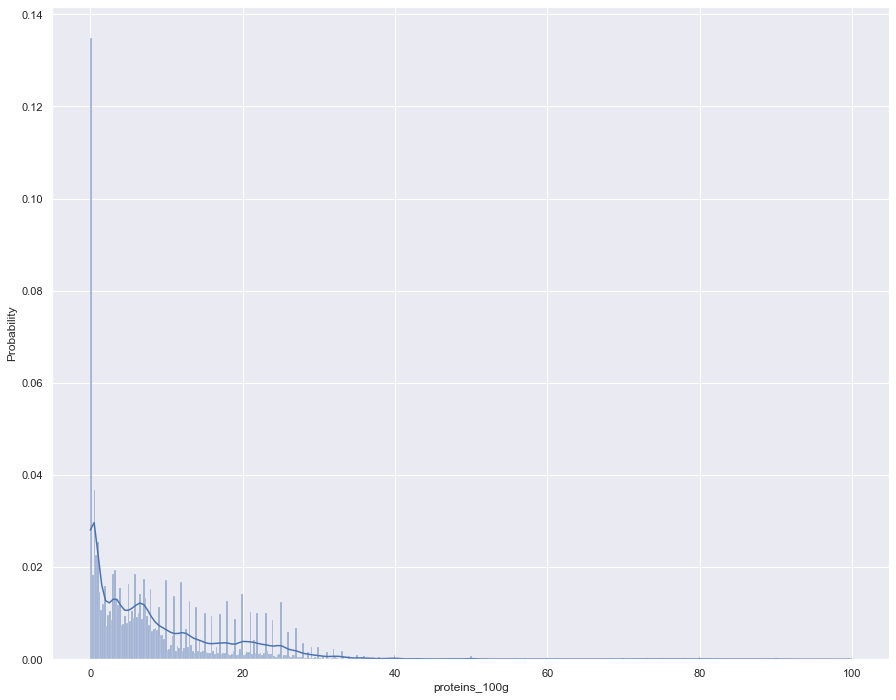

graphique variable actuel :salt_100g


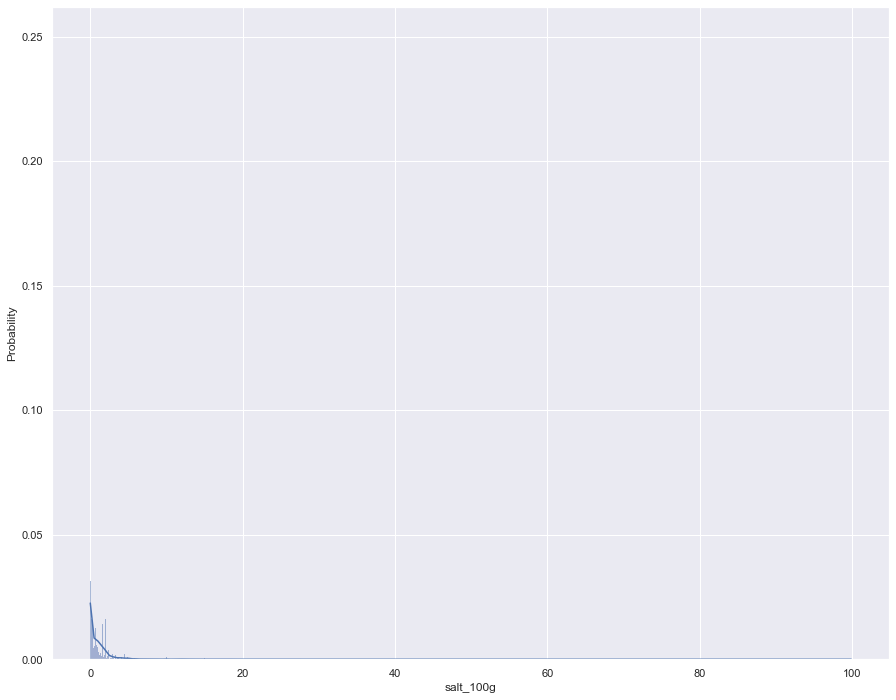

graphique variable actuel :sodium_100g


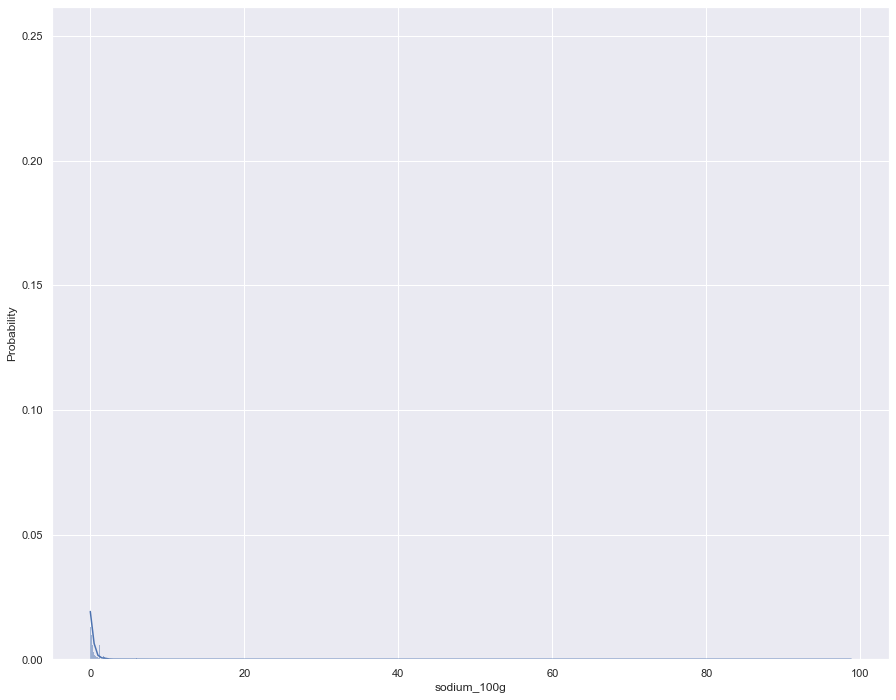

graphique variable actuel :nutrition-score-fr_100g


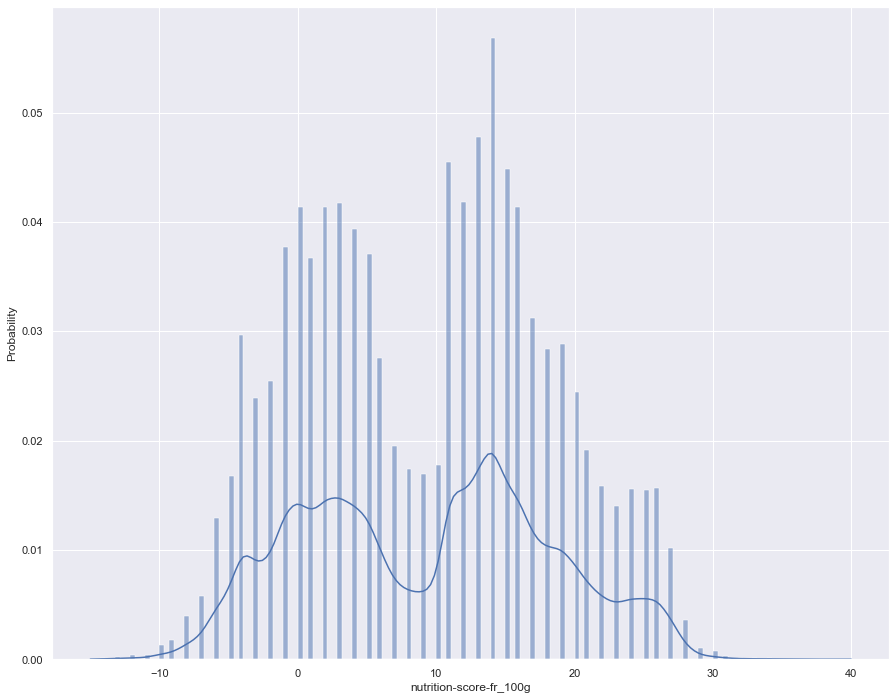

In [24]:
for col in var_quant:
    print('graphique variable actuel :'+ col)
    plt.figure()
    sns.histplot(data_0[col], stat='probability', kde=True)
    plt.show()

### Analyse bivariée

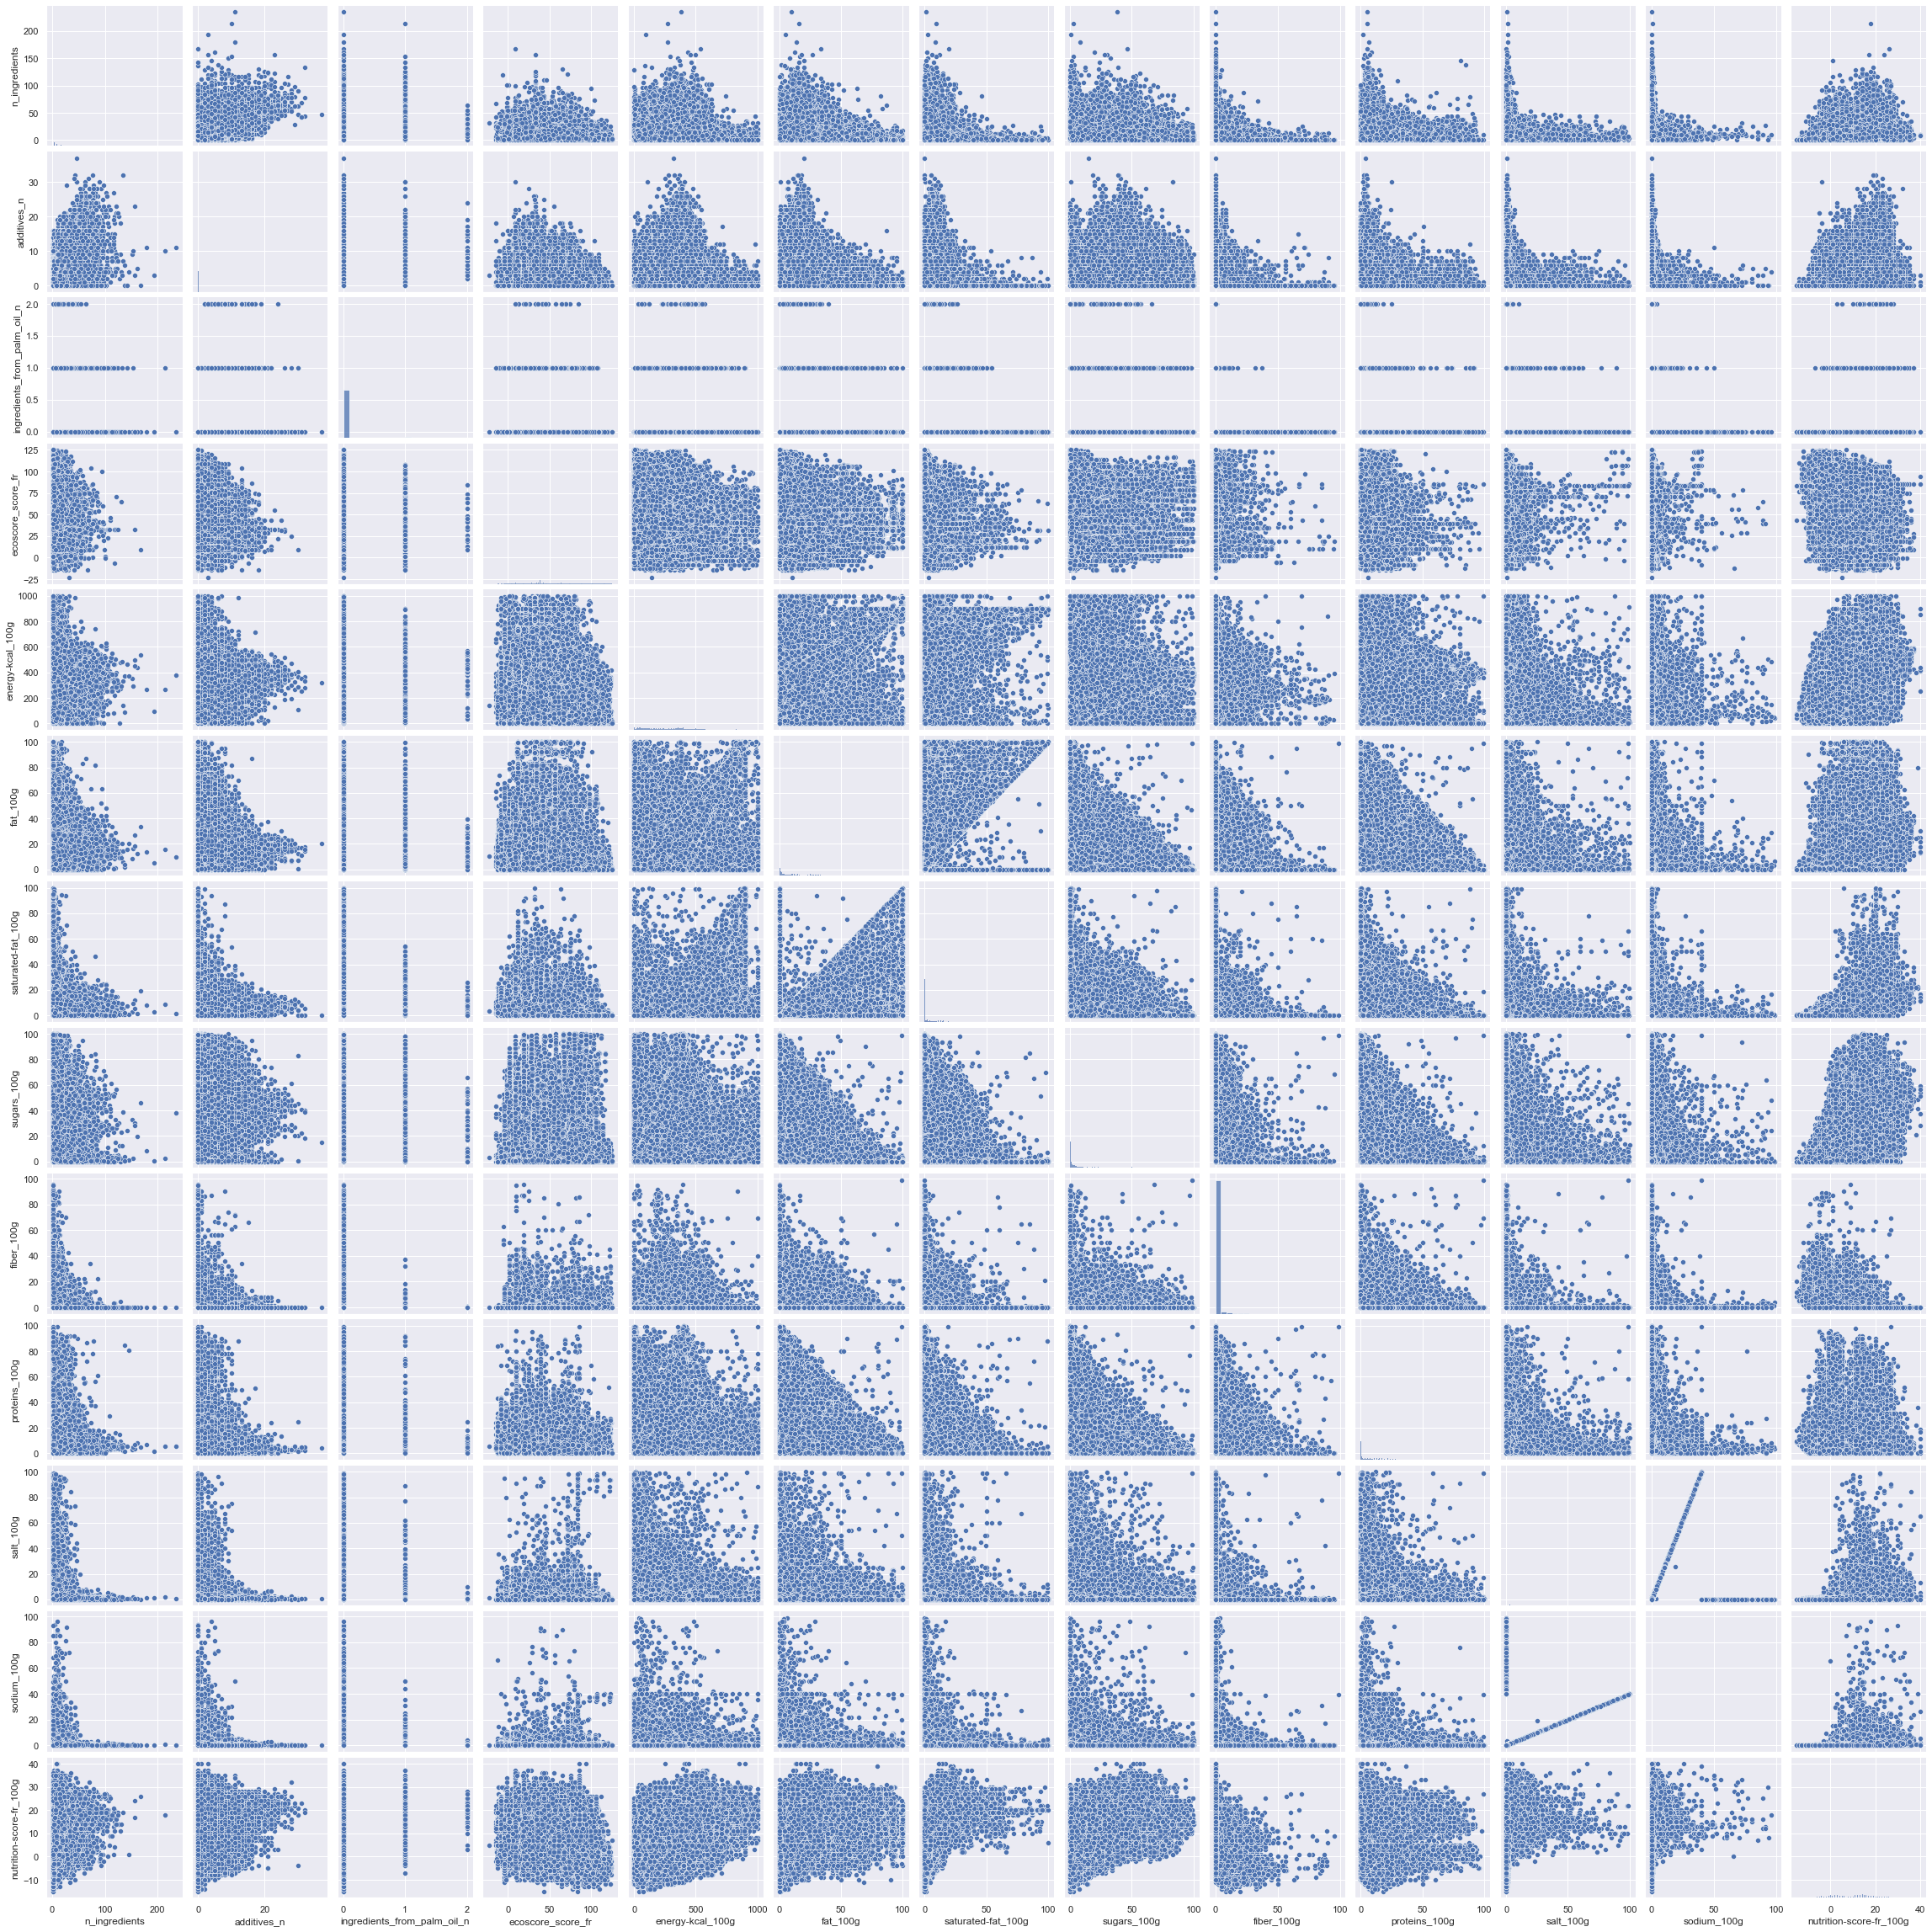

In [23]:
#lien entre variable quant
sns.pairplot(data_0[var_quant])

#### Certains graphiques déssinent un nuage du style x+y <= k, Ex : fat_100g vs proteins_100g. Pour ces graphiques on a affaire des variables qui sont souvent des parts de 100g  d'aliment.

#### quelques commentaires

In [24]:
### Matrice des correlation
data_0[var_quant].corr()

n_ingredients  additives_n  \
n_ingredients                     1.000000     0.636409   
additives_n                       0.636409     1.000000   
ingredients_from_palm_oil_n       0.121350     0.100473   
ecoscore_score_fr                -0.108762    -0.134476   
energy-kcal_100g                  0.080175     0.054564   
fat_100g                         -0.002975    -0.055151   
saturated-fat_100g               -0.009136    -0.033426   
sugars_100g                       0.082830     0.229078   
fiber_100g                       -0.081634    -0.118153   
proteins_100g                    -0.057650    -0.120291   
salt_100g                         0.069406     0.006903   
sodium_100g                       0.056862     0.004508   
nutrition-score-fr_100g           0.254229     0.260830   

                             ingredients_from_palm_oil_n  ecoscore_score_fr  \
n_ingredients                                   0.121350          -0.108762   
additives_n                                     0.100473          -0.134476   
ingredients_from_palm_oil_n                     1.000000          -0.082259   
ecoscore_score_fr                              -0.082259           1.000000   
energy-kcal_100g                                0.114368          -0.253793   
fat_100g                                        0.072755          -0.283382   
saturated-fat_100g                              0.092442          -0.265019   
sugars_100g                                     0.078898           0.028365   
fiber_100g                                     -0.036986           0.078789   
proteins_100g                                  -0.021086          -0.402453   
salt_100g                                      -0.002607          -0.044148   
sodium_100g                                    -0.002058          -0.033408   
nutrition-score-fr_100g                         0.127508          -0.308335   

                             energy-kcal_100g  fat_100g  saturated-fat_100g  \
n_ingredients                        0.080175 -0.002975           -0.009136   
additives_n                          0.054564 -0.055151           -0.033426   
ingredients_from_palm_oil_n          0.114368  0.072755            0.092442   
ecoscore_score_fr                   -0.253793 -0.283382           -0.265019   
energy-kcal_100g                     1.000000  0.736157            0.548243   
fat_100g                             0.736157  1.000000            0.711173   
saturated-fat_100g                   0.548243  0.711173            1.000000   
sugars_100g                          0.249799 -0.094941            0.006230   
fiber_100g                           0.052345 -0.021108           -0.061702   
proteins_100g                        0.207720  0.163427            0.166900   
salt_100g                            0.000631  0.028016            0.018870   
sodium_100g                         -0.004098  0.020192            0.014390   
nutrition-score-fr_100g              0.568001  0.487003            0.566474   

                             sugars_100g  fiber_100g  proteins_100g  \
n_ingredients                   0.082830   -0.081634      -0.057650   
additives_n                     0.229078   -0.118153      -0.120291   
ingredients_from_palm_oil_n     0.078898   -0.036986      -0.021086   
ecoscore_score_fr               0.028365    0.078789      -0.402453   
energy-kcal_100g                0.249799    0.052345       0.207720   
fat_100g                       -0.094941   -0.021108       0.163427   
saturated-fat_100g              0.006230   -0.061702       0.166900   
sugars_100g                     1.000000   -0.020524      -0.293282   
fiber_100g                     -0.020524    1.000000       0.036363   
proteins_100g                  -0.293282    0.036363       1.000000   
salt_100g                      -0.106668   -0.008544       0.126539   
sodium_100g                    -0.086253   -0.005426       0.099430   
nutrition-score-fr_100g         0.364944   -0.237312       0.1006

<AxesSubplot:>

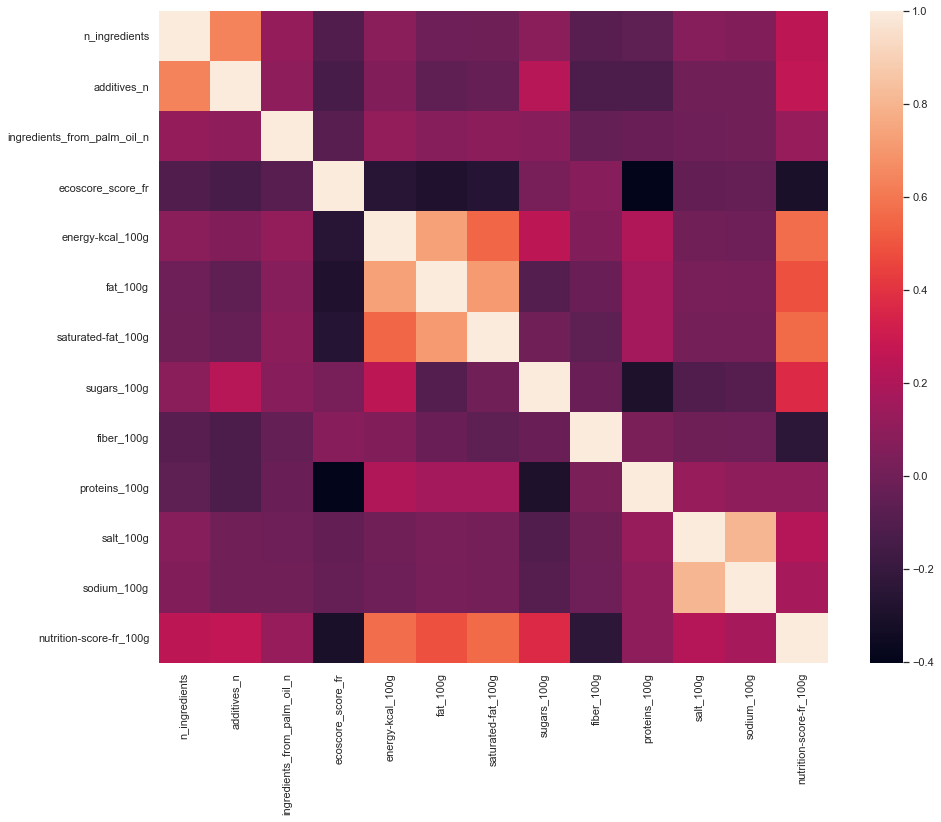

In [25]:
sns.heatmap(data_0[var_quant].corr())

### Notes :
     - IL y a une forte correlation entre le nombre d'additif et le nombre d'indigrédients / sel et sodium
     - Liste liaisons moyennes :
         - fat et energy-kcal
         - nutrition-score-fr et energy-kcal / fat / sugar

## Analyse des variables categorielles:

### Analyse univariée

In [26]:
data_0[var_cat].describe()

nutriscore_grade pnns_groups_1 pnns_groups_2  nova_group  \
count            480662       1161246       1163212    364468.0   
unique                5            14            46         4.0   
top                   d       unknown       unknown         4.0   
freq             156759        696841        696841    233720.0   

       ecoscore_grade_fr  
count             285731  
unique                 5  
top                    d  
freq              100242

In [27]:
data_0['nova_group'].value_counts()

4.0    233720
3.0     81047
1.0     43097
2.0      6604
Name: nova_group, dtype: int64

graphique variable actuel :nutriscore_grade


D:\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


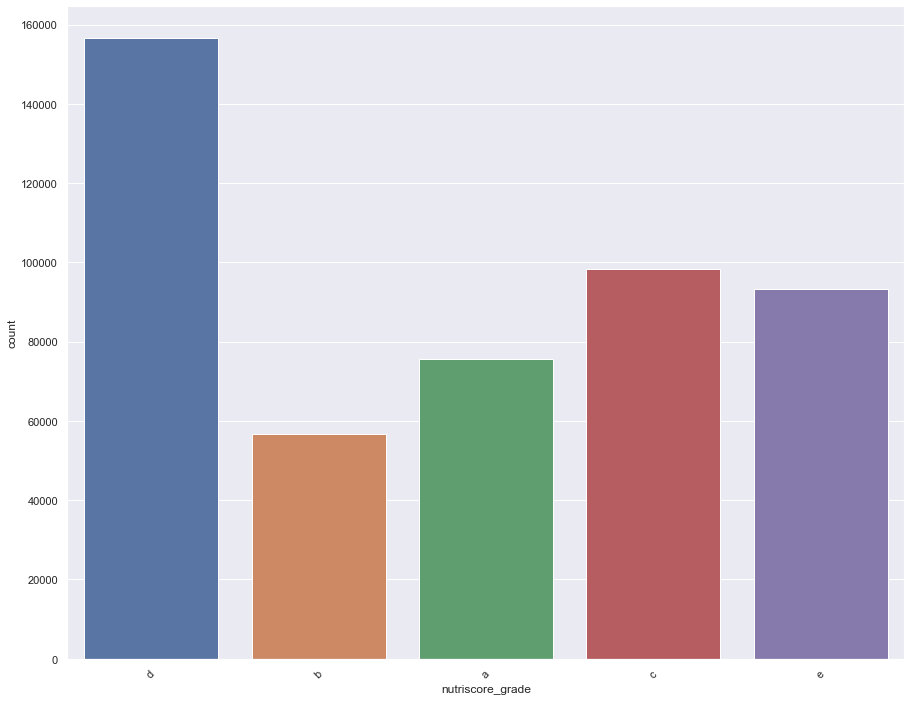

graphique variable actuel :pnns_groups_1


D:\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


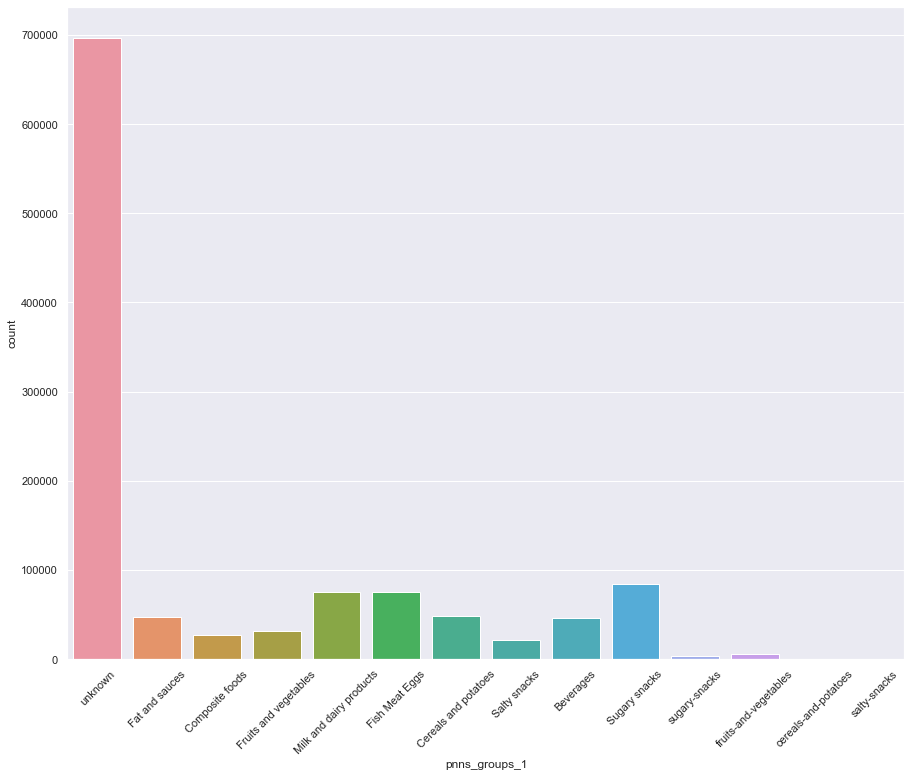

graphique variable actuel :ecoscore_grade_fr


D:\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


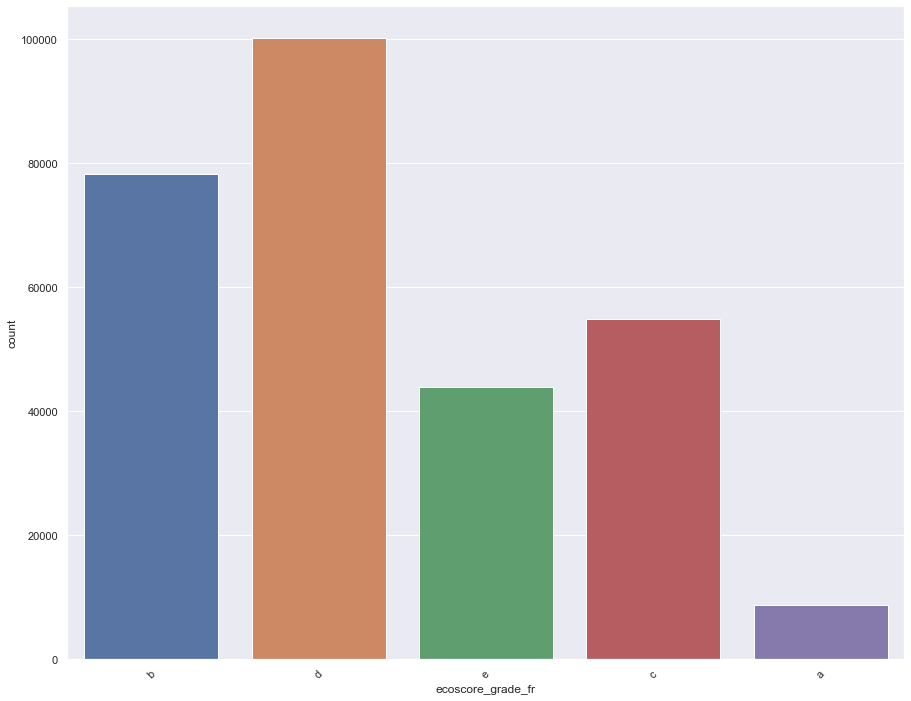

In [28]:
for col in ['nutriscore_grade','pnns_groups_1', 'ecoscore_grade_fr']:
    print('graphique variable actuel :'+ col)
    plt.figure()
    sns.countplot(data_0[col])
    plt.xticks(rotation=45)
    plt.show()

In [29]:
for col in var_cat:
    print('variable actuel :'+ col)
    print(pd.concat(
        [data_0[col].value_counts().sort_values(ascending=False),
        data_0[col].value_counts(normalize=True).sort_values(ascending=False)*100], axis=1
    ))
    print('\n ----------------------------------------------------------------')

variable actuel :nutriscore_grade
   nutriscore_grade  nutriscore_grade
d            156759         32.613146
c             98350         20.461364
e             93198         19.389509
a             75645         15.737670
b             56710         11.798311

 ----------------------------------------------------------------
variable actuel :pnns_groups_1
                         pnns_groups_1  pnns_groups_1
unknown                         696841      60.008043
Sugary snacks                    84433       7.270897
Fish Meat Eggs                   75666       6.515932
Milk and dairy products          74704       6.433090
Cereals and potatoes             47734       4.110585
Fat and sauces                   47344       4.077000
Beverages                        45847       3.948087
Fruits and vegetables            31543       2.716306
Composite foods                  26960       2.321644
Salty snacks                     21410       1.843709
fruits-and-vegetables             5212       0

### Notes
    - environ 3/4 des produits sont dans les catégories c,d,e nutriscore_grade
    - Plus d'un produit sur 2 a un pnns_groups unknow autant mieux faire 2 catégories les connus et les non-connus
    - pret de 87% des produits sont des produits fortement tranformés
        - plus d'un produit sur 2 est un produit ultra transformés
    - plus d'un produit sur 2 a un mauvais score ecologique

### Analyse bivariée cat 

In [29]:
#Quels sont les produits keto compatibles
data_0[data_0[target]==1].pnns_groups_1.value_counts()

unknown                    1557
Salty snacks                277
Milk and dairy products     153
Composite foods              69
Cereals and potatoes         59
Fish Meat Eggs               44
Sugary snacks                44
Fat and sauces               33
Fruits and vegetables        16
Beverages                     5
fruits-and-vegetables         1
Name: pnns_groups_1, dtype: int64

In [31]:
data_0['nutriscore_grade_bin'] = np.where(data_0['nutriscore_grade'].isin(['a','b']),'bon score', 'faible score')
data_0['nutriscore_grade_bin'] = np.where(data_0['nutriscore_grade'].isna(),np.nan, data_0['nutriscore_grade_bin'])

<ipython-input-31-3be00447ae5c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_0['nutriscore_grade_bin'] = np.where(data_0['nutriscore_grade'].isin(['a','b']),'bon score', 'faible score')
<ipython-input-31-3be00447ae5c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_0['nutriscore_grade_bin'] = np.where(data_0['nutriscore_grade'].isna(),np.nan, data_0['nutriscore_grade_bin'])


In [32]:
data_0['nutriscore_grade_bin'].value_counts(normalize=True)*100

faible score    72.464018
bon score       27.535982
Name: nutriscore_grade_bin, dtype: float64

In [33]:
data_0['pnns'] = np.where(data_0['pnns_groups_2']=='unknown','unknown', 'known')
data_0['pnns'] = np.where(data_0['pnns_groups_2'].isna(),np.nan, data_0['pnns'])

<ipython-input-33-d19b7adbc404>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_0['pnns'] = np.where(data_0['pnns_groups_2']=='unknown','unknown', 'known')
<ipython-input-33-d19b7adbc404>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_0['pnns'] = np.where(data_0['pnns_groups_2'].isna(),np.nan, data_0['pnns'])


In [41]:
data_0['transformed'] =  np.where(data_0['nova_group'].isin([3,4]),'Transformed', 'non transformed')
data_0['transformed'] =  np.where(data_0['nova_group'].isna(),np.nan, data_0['transformed'])

<ipython-input-41-00105b52dcff>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_0['transformed'] =  np.where(data_0['nova_group'].isin([3,4]),'Transformed', 'non transformed')
<ipython-input-41-00105b52dcff>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_0['transformed'] =  np.where(data_0['nova_group'].isna(),np.nan, data_0['transformed'])


In [42]:
data_0['ultra_transformed'] = np.where(data_0['nova_group']==4,'ultraTransformed', 'non ultra_transformed')
data_0['ultra_transformed'] =  np.where(data_0['nova_group'].isna(),np.nan, data_0['ultra_transformed'])

<ipython-input-42-b879c60c7f8b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_0['ultra_transformed'] = np.where(data_0['nova_group']==4,'ultraTransformed', 'non ultra_transformed')
<ipython-input-42-b879c60c7f8b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_0['ultra_transformed'] =  np.where(data_0['nova_group'].isna(),np.nan, data_0['ultra_transformed'])


In [36]:
data_0['pnns'].value_counts(normalize=True)*100

unknown    59.906621
known      40.093379
Name: pnns, dtype: float64

In [43]:
data_0['transformed'].value_counts(normalize=True)*100

Transformed        86.363412
non transformed    13.636588
Name: transformed, dtype: float64

In [37]:
from itertools import combinations

In [44]:
L = pd.Series(['nutriscore_grade_bin','pnns','transformed','ultra_transformed','ecoscore_grade_fr'])
for i in combinations(L,2):
    print('\033[1m' + 'variable : '+ i[0] + ' vs ' + i[1] +'\033[0m' , '\n')
    print(
        pd.crosstab(data_0[i[0]], data_0[i[1]], normalize=True)*100
    )
    print('\n ----------------------------------------------------------------')


variable : nutriscore_grade_bin vs pnns 

pnns                      known    unknown
nutriscore_grade_bin                      
bon score             24.003978   3.532004
faible score          62.134931  10.329088

 ----------------------------------------------------------------
variable : nutriscore_grade_bin vs transformed 

transformed           Transformed  non transformed
nutriscore_grade_bin                              
bon score               18.557461        10.108411
faible score            66.977174         4.356954

 ----------------------------------------------------------------
variable : nutriscore_grade_bin vs ultra_transformed 

ultra_transformed     non ultra_transformed  ultraTransformed
nutriscore_grade_bin                                         
bon score                         18.158088         10.507784
faible score                      21.856372         49.477756

 ----------------------------------------------------------------
variable : nutriscore_grade_b

## Multiviriate

### var quant

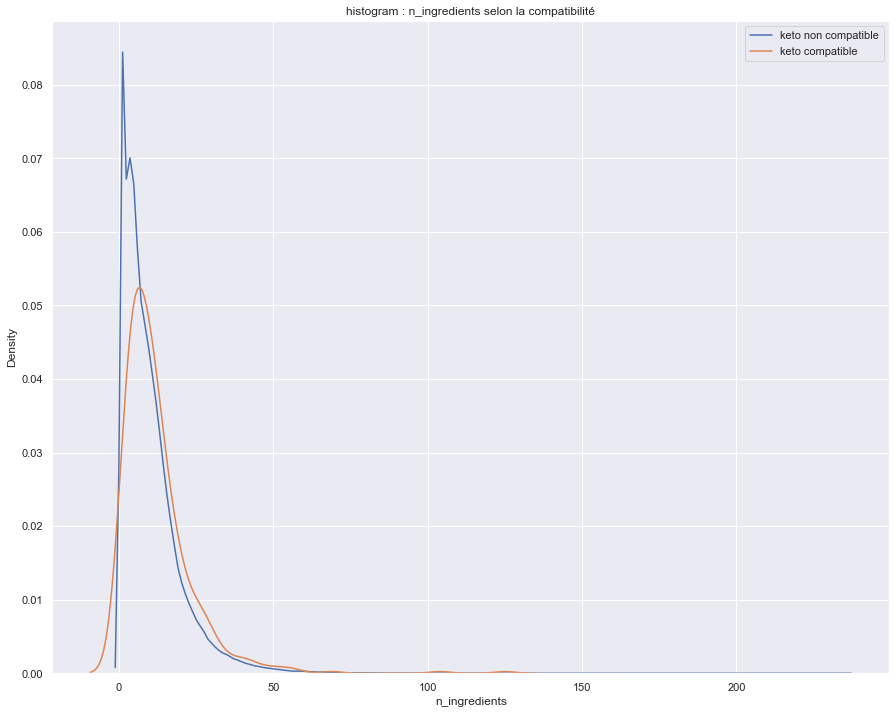

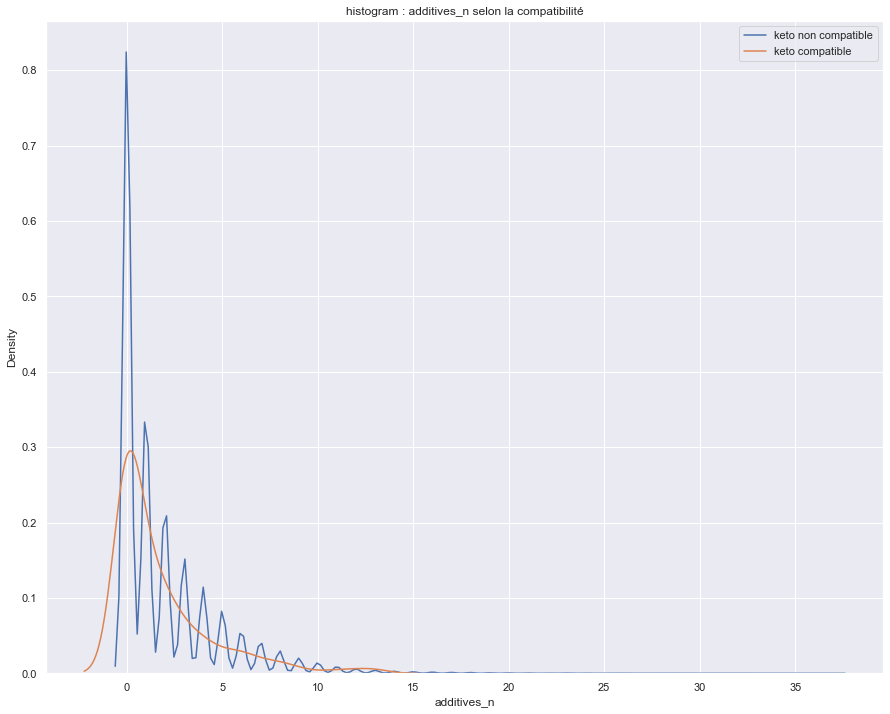

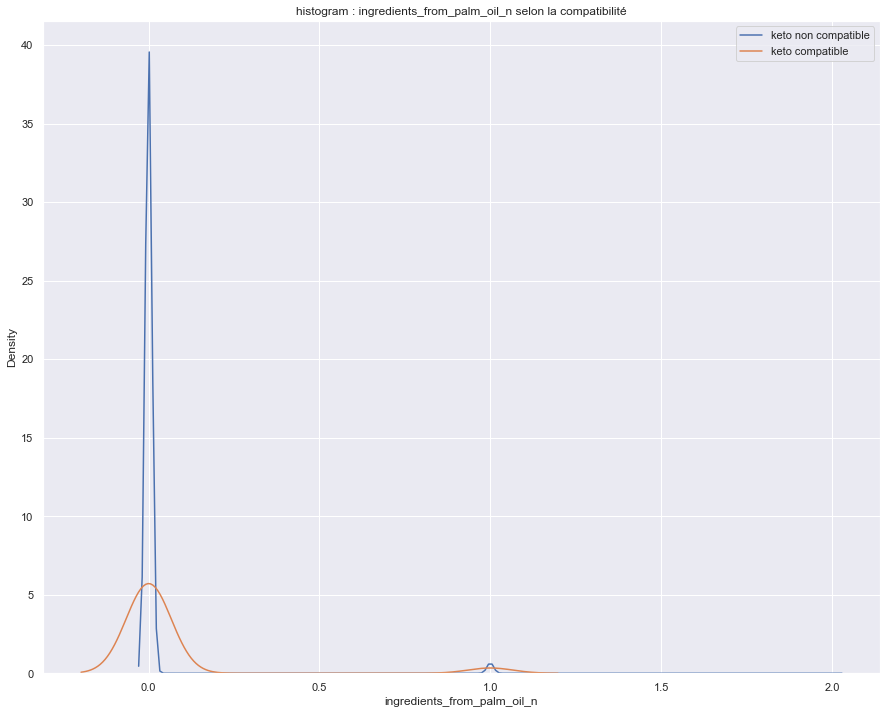

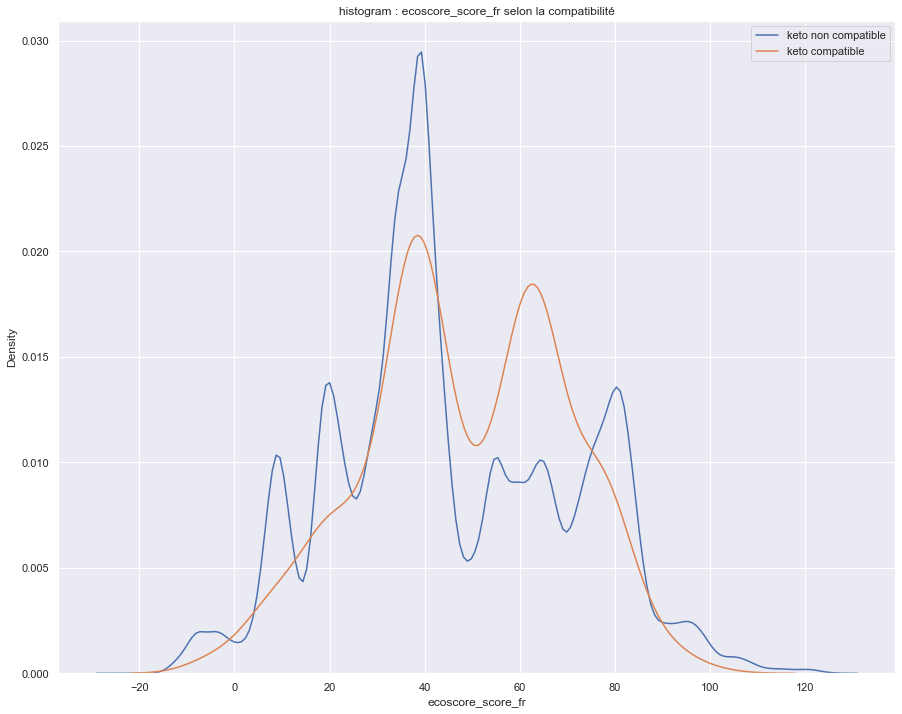

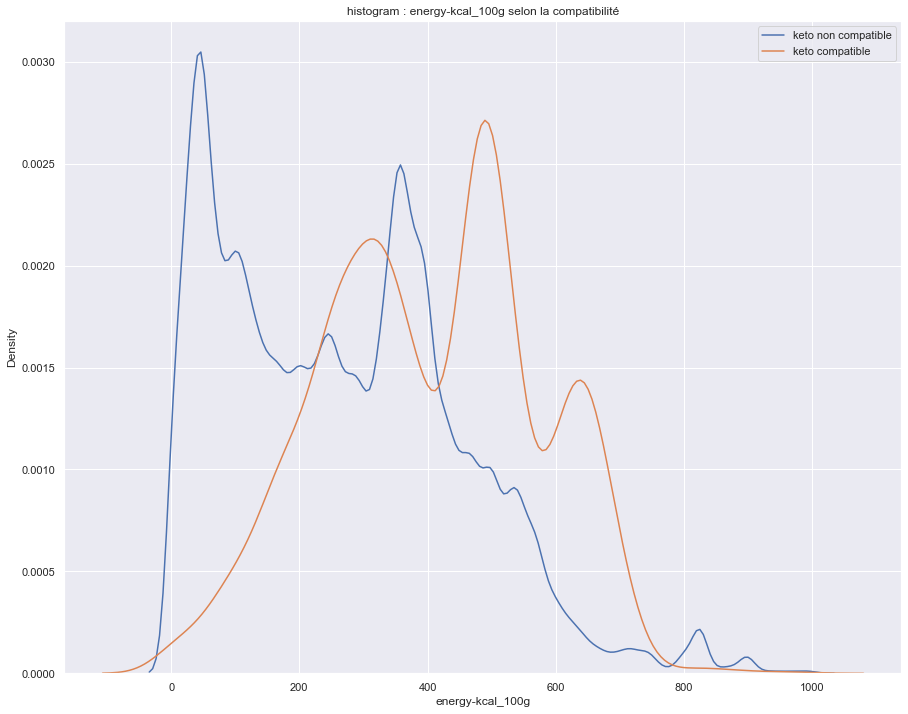

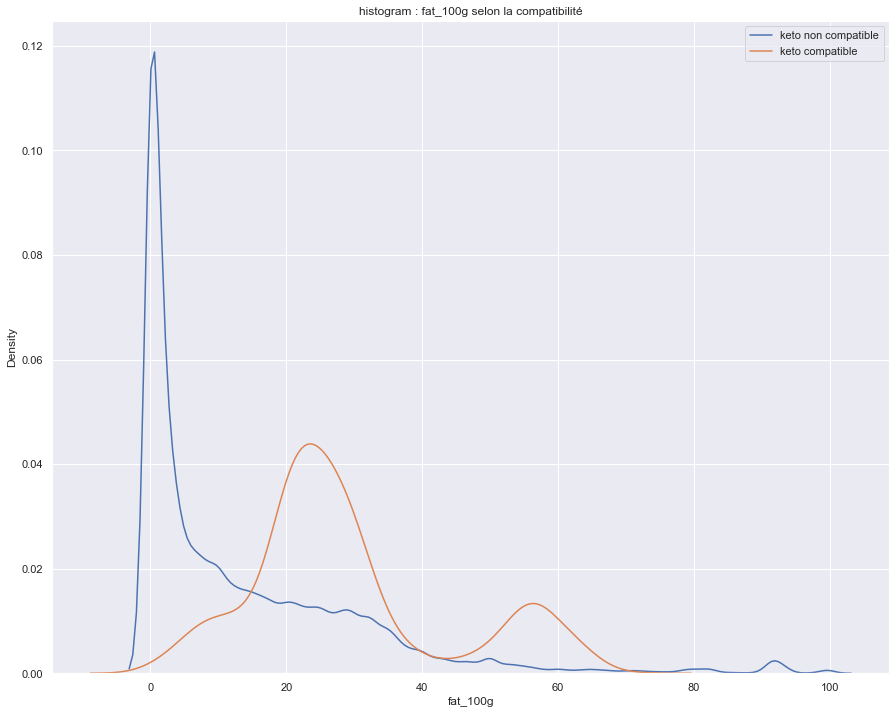

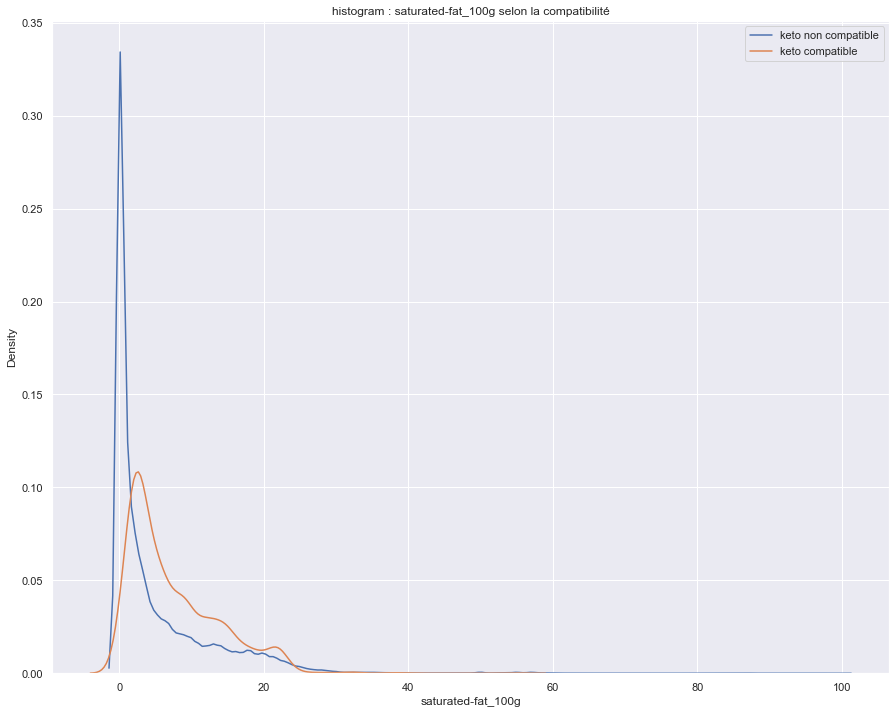

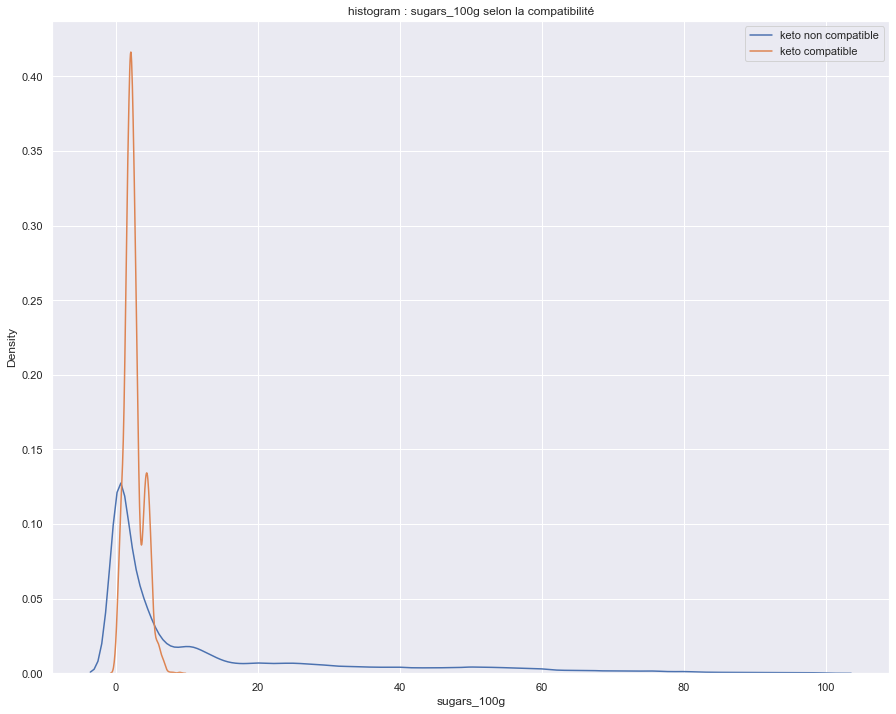

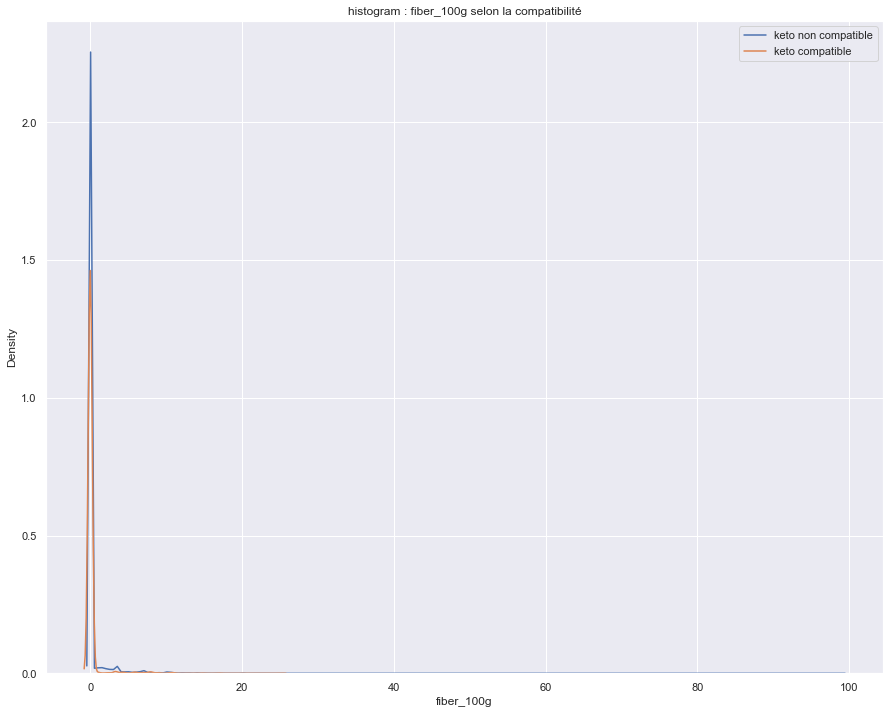

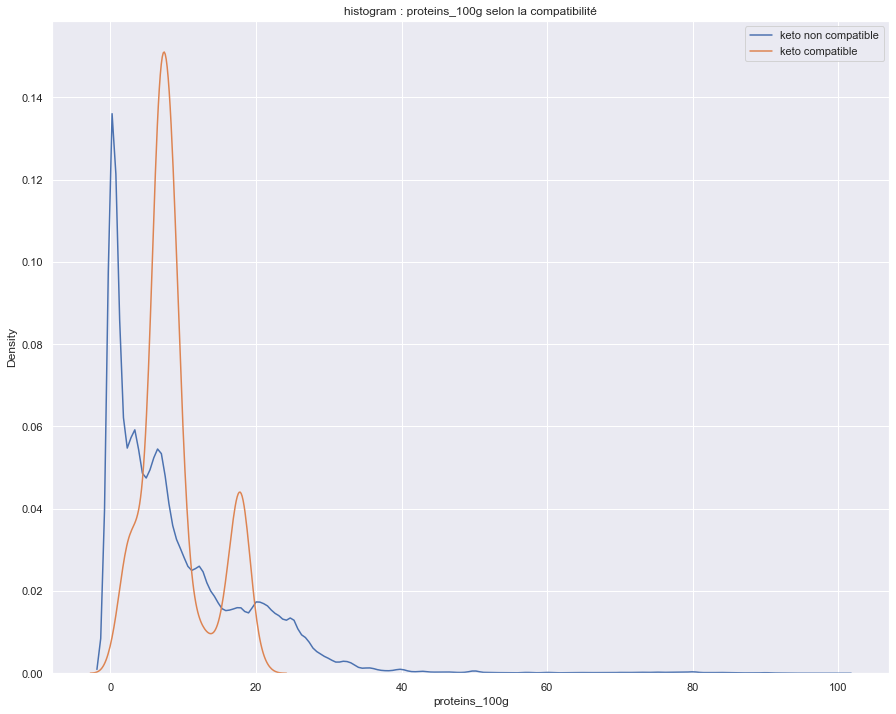

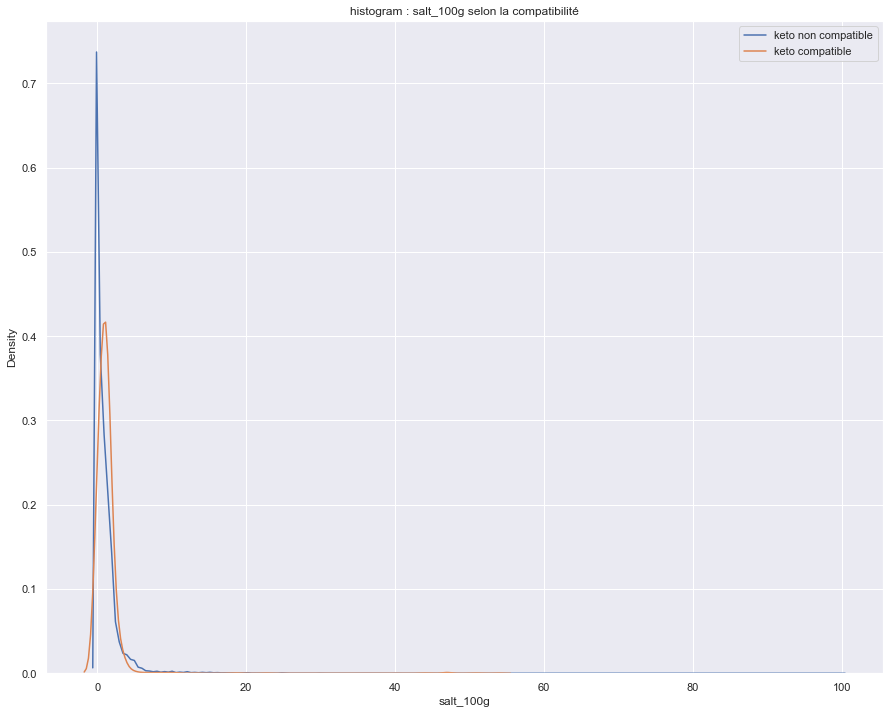

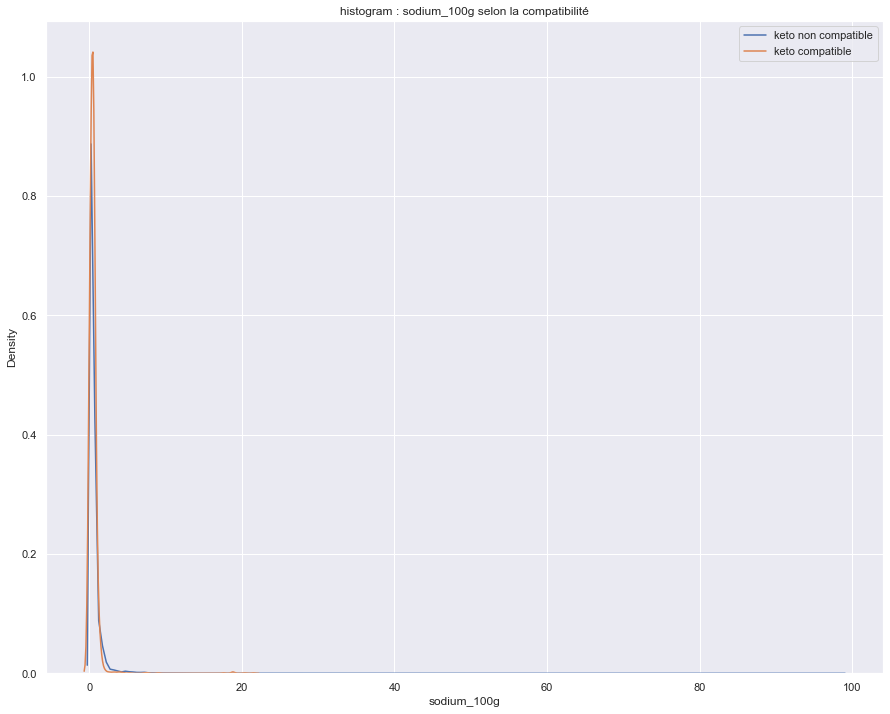

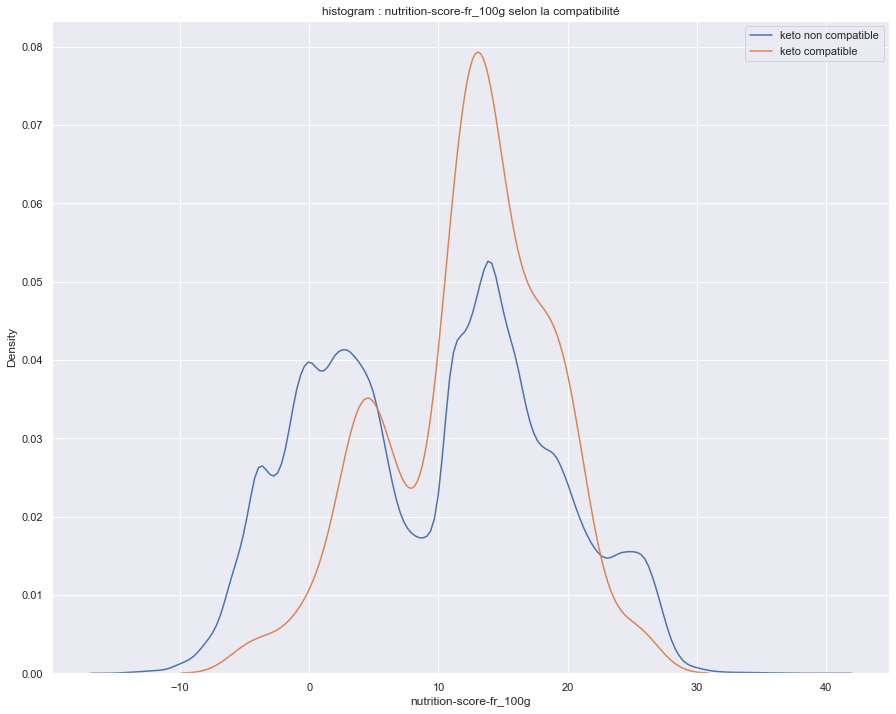

In [45]:
for col in var_quant:
    plt.figure()
    plt.title('histogram : '+ col +' selon la compatibilité')
    sns.kdeplot(data_0[data_0[target]==0][col])
    sns.kdeplot(data_0[data_0[target]==1][col])
    plt.legend(['keto non compatible', 'keto compatible' ])
    plt.show()

### Notes : Ces graphiques emmènent à formuler un certains nombre d'hypothèse
    1- les produits compatbiles au régime cétogène ont-ils moins d'ingrédients que les non compatibles ?
    2- les produits compatbiles au régime cétogène ont-ils moins d'ingrédients issu de l'huile de palme que les non compatibles ?
    3- les produits keto-compat. ont-ils un meilleur ecoscore que les non?
    4- les produits keto-compat. sont-ils plus caloriques?
    5- plus sucrés? plus protéinés?
    6- moins salé? un meilleur nutriscore?

In [60]:
#classe pour standardisation
from sklearn.preprocessing import StandardScaler
from sklearn import decomposition

In [61]:
#instanciation
sc = StandardScaler()
#transformation – centrage-réduction
Z = sc.fit_transform(data_0[var_quant].dropna())
print(Z)

[[-0.87882578 -0.65050201 -0.14196622 ...  2.11733001  1.51586133
   0.92336459]
 [-0.64154553 -0.65050201 -0.14196622 ... -0.57155364 -0.41921004
  -0.74495391]
 [-0.40426528 -0.23548737 -0.14196622 ... -0.55986284 -0.41079668
  -0.96739638]
 ...
 [-0.40426528  0.17952727 -0.14196622 ... -0.55401744 -0.40659001
   0.81214336]
 [-0.04834489 -0.65050201 -0.14196622 ... -0.57155364 -0.41921004
   0.14481596]
 [-0.5229054  -0.23548737 -0.14196622 ... -0.57155364 -0.41921004
  -1.41228131]]


In [62]:
#classe pour l'ACP
from sklearn.decomposition import PCA
#instanciation
acp = PCA()

In [63]:
#calculs
coord = acp.fit_transform(Z)
#nombre de composantes calculées
print(acp.n_components_)

13


In [64]:
coord

array([[ 0.0818459 ,  1.05770701,  1.7134931 , ..., -0.64823596,
        -0.35350043, -0.01885566],
       [-1.58481166, -1.20436832, -1.4932538 , ...,  0.08919332,
         0.66385867, -0.25478035],
       [-1.52705398, -1.63672601, -0.84134198, ...,  0.22725877,
         1.24426022,  0.06144764],
       ...,
       [-1.19288997, -0.74126287,  0.00734626, ..., -0.26273551,
        -1.20847488, -0.1379869 ],
       [-1.48163295, -0.37511866, -0.17527245, ...,  0.0132021 ,
        -0.70066516, -0.07666286],
       [-2.62142481, -0.07552318, -0.34696679, ...,  0.08765565,
         0.38164444, -0.12739346]])

In [65]:
# Eboulis des valeurs propres
acp.explained_variance_

array([3.45506611, 2.18587205, 1.78256786, 1.03291745, 1.0277404 ,
       0.9383381 , 0.9103633 , 0.4851953 , 0.34258782, 0.30783018,
       0.28111146, 0.16990657, 0.0805973 ])

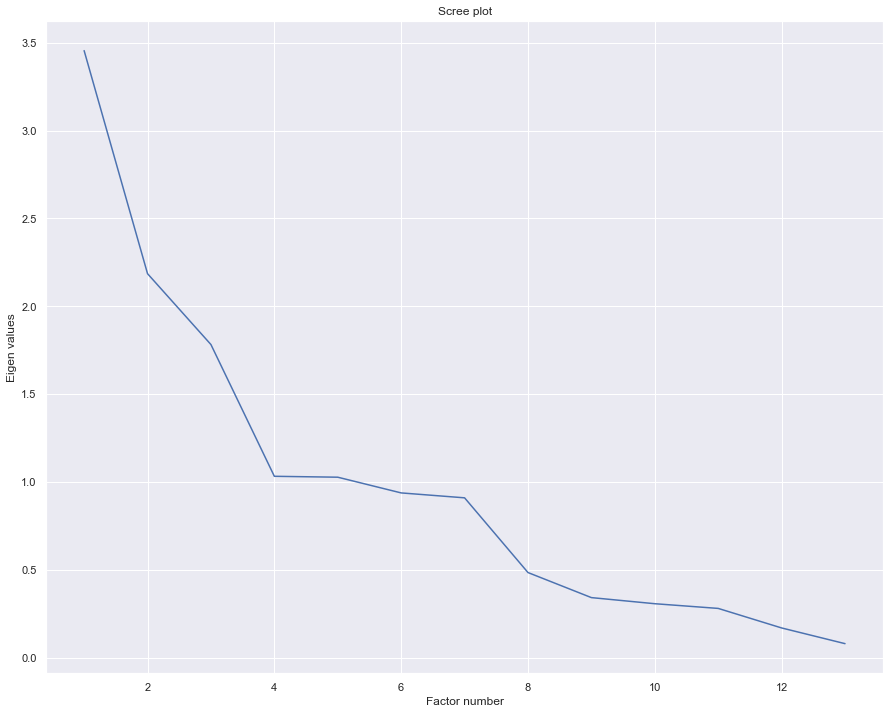

In [68]:
#scree plot
plt.plot(np.arange(1,14),acp.explained_variance_)
plt.title("Scree plot")
plt.ylabel("Eigen values")
plt.xlabel("Factor number")
plt.show()

In [69]:
# Calcul des seuils du critère des batons brisé
bs = 1/np.arange(13,0,-1)
bs = np.cumsum(bs)
bs = bs[::-1]

In [70]:
#test des bâtons brisés
print(pd.DataFrame({'Val.Propre':acp.explained_variance_,'Seuils':bs}))

    Val.Propre    Seuils
0     3.455066  3.180134
1     2.185872  2.180134
2     1.782568  1.680134
3     1.032917  1.346800
4     1.027740  1.096800
5     0.938338  0.896800
6     0.910363  0.730134
7     0.485195  0.587277
8     0.342588  0.462277
9     0.307830  0.351166
10    0.281111  0.251166
11    0.169907  0.160256
12    0.080597  0.076923


### On a un coude au facteur 4 et la règle des batons brisés, nous emmène à choisir les 4 premiers facteurs

In [72]:
#proportion de variance expliquée
np.cumsum(acp.explained_variance_ratio_*100)

array([ 26.57723965,  43.39151862,  57.10348003,  65.04894147,
        72.95457974,  80.17251296,  87.17525701,  90.90750155,
        93.54277347,  95.91068083,  98.07306105,  99.38002524,
       100.        ])

### les 4 premières facteurs repésentent 65 % de l'information

In [74]:
from importlib.machinery import SourceFileLoader

In [75]:
mf = SourceFileLoader('functions', "C:/Users/MR & JP/own_functions/functions.py").load_module()

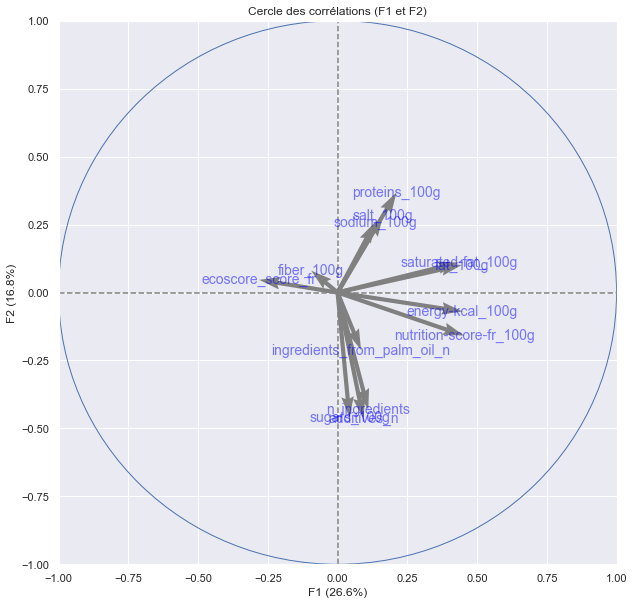

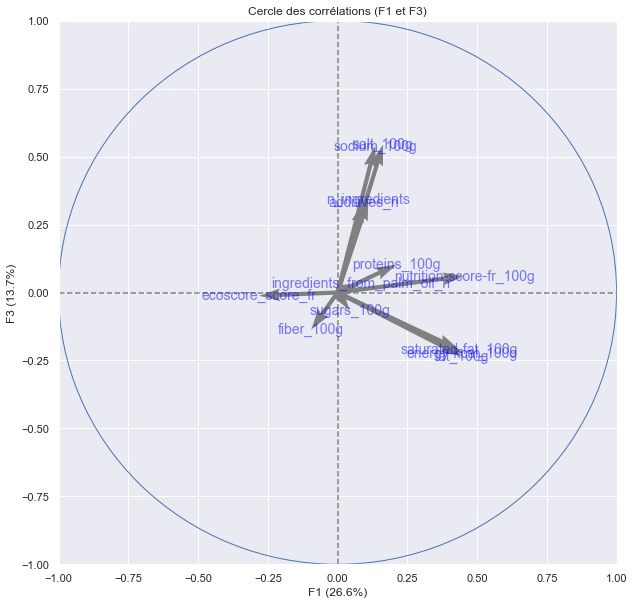

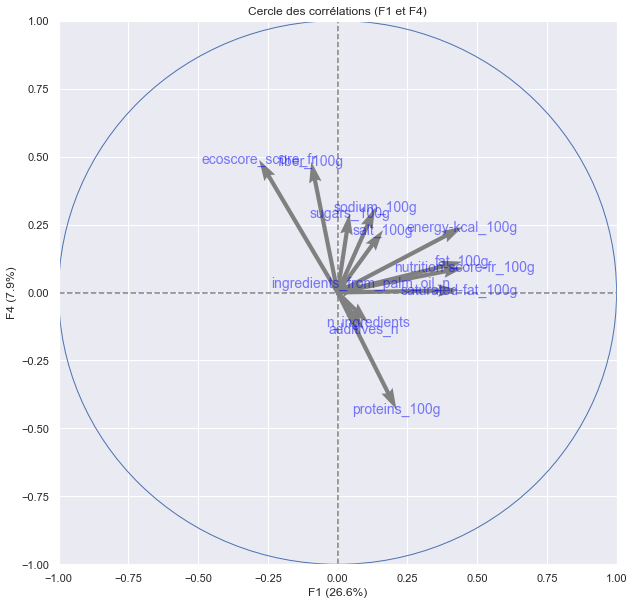

In [76]:
mf.display_circles(acp.components_, 4 , acp, [(0,1),(0,2), (0,3)], labels = np.array(data_0[var_quant].dropna().columns))

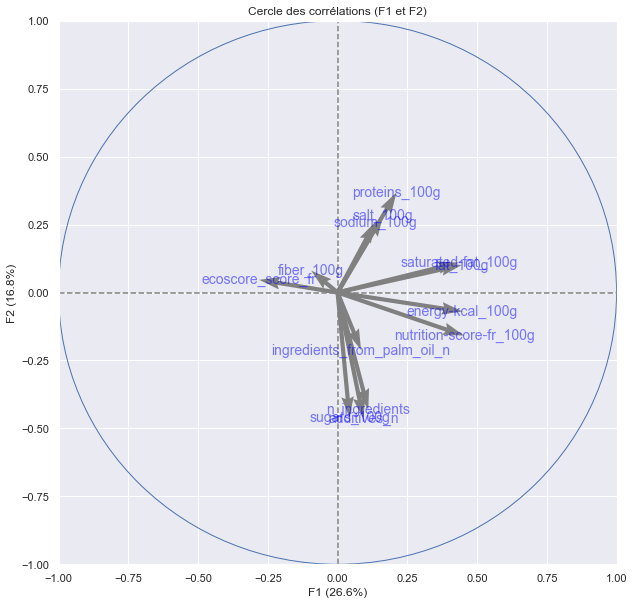

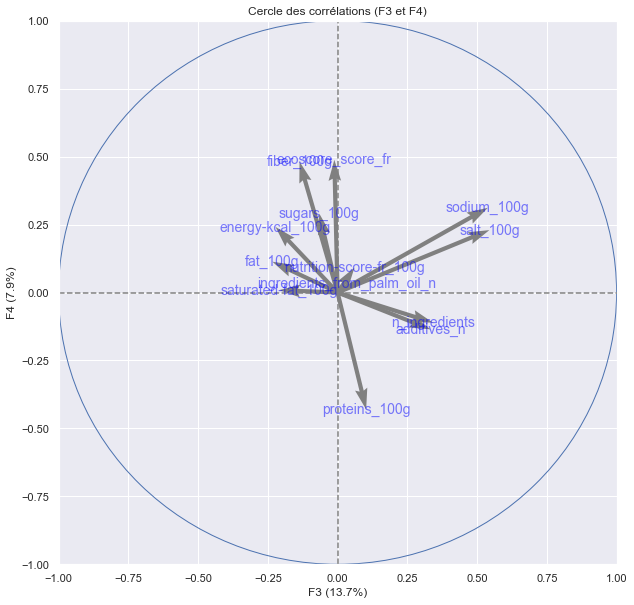

In [77]:
mf.display_circles(acp.components_, 4 , acp, [(0,1),(2,3)], labels = np.array(data_0[var_quant].dropna().columns))

### Notees:
    - F1 est un axe de classement des produit avec un bon nutriscore(faible) et un bon éco-grade(fort)
    - F2 est un axe d’opposition entre les produits salé et les produits sucrés

### Réalisations des tests d'hypothèses
    1- les produits compatbiles au régime cétogène ont-ils moins d'ingrédients que les non compatibles ?
    2- les produits compatbiles au régime cétogène ont-ils moins d'ingrédients issu de l'huile de palme que les non compatibles ?
    3- les produits keto-compat. ont-ils un meilleur ecoscore que les non?
    4- les produits keto-compat. sont-ils plus caloriques?
    5- plus sucrés? plus protéinés?
    6- moins salé? un meilleur nutiscore?

In [35]:
from scipy.stats import mannwhitneyu
from scipy.stats import ttest_ind

In [89]:
data_0['keto_friendly'].value_counts()

0    1160950
1       2262
Name: keto_friendly, dtype: int64

In [91]:
df_test=data_0[data_0['keto_friendly']==1].dropna()
df_test['keto_friendly'].value_counts()

1    10
Name: keto_friendly, dtype: int64

In [33]:
#Tirage d'un échantillons de 2262 dans les produits non cétogène pour faire les tests
# Set random seed
np.random.seed(42)
data_keto = data_0[data_0['keto_friendly']==1]
data_non_keto = data_0[data_0['keto_friendly']==0]

In [31]:
variables_test = ['n_ingredients','ingredients_from_palm_oil_n','ecoscore_score_fr','energy-kcal_100g','sugars_100g','proteins_100g','salt_100g', 'nutrition-score-fr_100g']

In [39]:
for col in variables_test:
    dimension = data_keto[col].dropna().shape[0]
    print('\033[1m'+'test '+ col +'\033[0m')
    print('-------------------------- \n')
    print("nombre d'unités :", len(data_keto[col].dropna()), '\n')
    res = ttest_ind(data_keto[col].dropna(), data_non_keto[col].dropna().sample(n=dimension))
    print(res, '\n')
    res = ttest_ind(data_keto[col].dropna(), data_non_keto[col].dropna().sample(n=dimension), alternative='greater')
    print( 'Greater ? \n',res)
    print('\n *********************************************\n')

test n_ingredients
-------------------------- 

nombre d'unités : 505 

Ttest_indResult(statistic=2.2472826221053865, pvalue=0.024837610956365528) 

Greater ? 
 Ttest_indResult(statistic=2.1709528325154466, pvalue=0.015083754150180463)

 *********************************************

test ingredients_from_palm_oil_n
-------------------------- 

nombre d'unités : 505 

Ttest_indResult(statistic=3.195324867693583, pvalue=0.0014401155525534514) 

Greater ? 
 Ttest_indResult(statistic=3.63276856974082, pvalue=0.00014726457242965926)

 *********************************************

test ecoscore_score_fr
-------------------------- 

nombre d'unités : 517 

Ttest_indResult(statistic=2.3694527241948076, pvalue=0.017997638267164585) 

Greater ? 
 Ttest_indResult(statistic=2.087015258958723, pvalue=0.01856583582234471)

 *********************************************

test energy-kcal_100g
-------------------------- 

nombre d'unités : 2248 

Ttest_indResult(statistic=26.425726101393565, pvalue=

### Notes 

    - Ho : égalité des moyennes
    - H1 : différences sig,ificatives entre les moyennes
    
    - Ho : la moyenne de x est inférieure ou égale à la moyenne de y
    - H1 : la moyenne de x est supérieur à le moyenne de y

### Interpréations des tests
    - la moyenne des ingrédients des produits cétogènes est significativement supérieure à celle des produits qui ne le sont pas au seuil de 5%.
    -Au seuil de 5%, la moyenne de l'écoscore des produits cétogènes est significativement supérieures à celle des produits qui ne le sont pas.
    - Au seuil de 5%, les moyenne de calorie, de sucre, de protéines, de sel et du nutriscore des produits cétogènes n'est pas significativement différentes à celles des produits qui ne le sont pas.